In [1]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import pystan 
import pandas as pd
from scipy.stats import gamma
import seaborn as sns
import math
import statistics as st
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import warnings
import ipywidgets 
from tqdm.notebook import tqdm

In [2]:
# Replicates of eating

rep_eat = 1000

In [3]:
sm1 = pickle.load(open('../../Cell Invasion/new stan model.pkl', 'rb'))

fit_27 = pickle.load(open('../../Cell Invasion/fit_27.pkl', 'rb'))
fit_42 = pickle.load(open('../../Cell Invasion/fit_42.pkl', 'rb'))
fit_48 = pickle.load(open('../../Cell Invasion/fit_48.pkl', 'rb'))

samples_27 = fit_27.extract(permuted=True)
samples_42 = fit_42.extract(permuted=True)
samples_48 = fit_48.extract(permuted=True)

In [4]:
sm_Colonic_filling = pickle.load(open('stan_model_Colonic_filling.pkl', 'rb'))
fit_nuts_Colonic_filling = pickle.load(open('fit_nuts_Colonic_filling.pkl', 'rb'))
samples_Colonic_filling = fit_nuts_Colonic_filling.extract(permuted=True)

In [5]:
sm_retention = pickle.load(open('stan_model_Retention_time.pkl', 'rb'))
fit_nuts_Solid_retention = pickle.load(open('fit_nuts_Solid_Retention_time.pkl', 'rb'))
fit_nuts_Liquid_retention = pickle.load(open('fit_nuts_Liquid_Retention_time.pkl', 'rb'))
samples_Liquid_retention = fit_nuts_Liquid_retention.extract(permuted=True)
samples_Solid_retention = fit_nuts_Solid_retention.extract(permuted=True)

In [6]:
# Import pH change with individual person variability from .pickle
sm_pH_change = pickle.load(open('Stan model for pH change.pkl', 'rb'))
fit_nuts_pH_change_younger = pickle.load(open('fit_nuts_pH_change_younger.pkl', 'rb'))
fit_nuts_pH_change_elder = pickle.load(open('fit_nuts_pH_change_elder.pkl', 'rb'))
samples_pH_change_younger = fit_nuts_pH_change_younger.extract(permuted=True)
samples_pH_change_elder = fit_nuts_pH_change_elder.extract(permuted=True)

In [7]:
# Loading Baysian model of gastric reduction
sm_GR_between_strain = pickle.load(open('between-strain model.pkl', 'rb'))
fit_nuts_between_strain = pickle.load(open('fit_nuts_between_strain.pkl', 'rb'))
samples_between_strain = fit_nuts_between_strain.extract(permuted=True)

In [8]:
# Color Difinition
Palette=sns.color_palette(n_colors = rep_eat)

#Max Time (h) 
Tmax = 15

##### Definition of Gastric passage log counts
logSg_list = []
logSg0_list = []
logSg0 = np.zeros((Tmax, 1), dtype=float)
logSg = np.zeros((Tmax, 1), dtype=float)
rcn_pH_list = np.zeros((rep_eat, 1), dtype=int)
rcn_stomach_reduction_list = np.zeros((rep_eat, 1), dtype=int)
rcn_colonic_filling_list = np.zeros((rep_eat, 1), dtype=int)
rcn_invasion_list = np.zeros((rep_eat, 1), dtype=int)
t_star = []
##### Simulation of Gastric passage log counts

# Color Difinition
Palette=sns.color_palette(n_colors = rep_eat)



#Difinition of time-array (h) 
x =  np.zeros((Tmax*60*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60*60+1)

##### Definition of Gastric passage log counts
logSg0_list = []
logSg0 = np.zeros((len(x), 1), dtype=float)
t_star = []

logSg0_27_list = []
logSg0_27 = np.zeros((len(x), 1), dtype=float)
t_star_27 = []

logSg0_42_list = []
logSg0_42 = np.zeros((len(x), 1), dtype=float)
t_star_42 = []

logSg0_48_list = []
logSg0_48 = np.zeros((len(x), 1), dtype=float)
t_star_48 = []

rcn_between_strain_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_27_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_42_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_48_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)
rcn_pH_list = np.zeros((rep_eat, 1), dtype=int)
pH_Lowest_list = np.zeros((rep_eat, 1), dtype=float)
pH_A_list = np.zeros((rep_eat, 1), dtype=float)
pH_k_list = np.zeros((rep_eat, 1), dtype=float)
pH_sigma_list = np.zeros((rep_eat, 1), dtype=float)
reduction_a_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_27_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_42_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_48_list = np.zeros((rep_eat, 1), dtype=float)


##### Simulation of Gastric passage log counts
warnings.simplefilter('ignore', RuntimeWarning)
for i in tqdm(range(rep_eat), desc = 'Progress', leave = False):
    
    rcn_pH = random.choice(range(len(samples_pH_change_younger["lp__"])))
    rcn_pH_list[i, 0] = rcn_pH
    Lowest = samples_pH_change_younger["Lowest"][rcn_pH]
    A = samples_pH_change_younger["A"][rcn_pH]
    k = samples_pH_change_younger["k"][rcn_pH]
    sigma_pH = samples_pH_change_younger["sigma"][rcn_pH]
    
    pH_Lowest_list[i, 0] = samples_pH_change_younger["Lowest"][rcn_pH]
    pH_A_list[i, 0] = samples_pH_change_younger["A"][rcn_pH]
    pH_k_list[i, 0] = samples_pH_change_younger["k"][rcn_pH]
    pH_sigma_list[i, 0] = samples_pH_change_younger["sigma"][rcn_pH]
    
    

    rcn_between_strain = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_between_strain_list[i, 0] = rcn_between_strain
    abef0 = samples_between_strain["abef0"][rcn_between_strain]
    cov = samples_between_strain["cov"][rcn_between_strain]
    abef = np.random.multivariate_normal(abef0, cov, size = 1)[0]
    a = abef[0]
    b = abef[1]
    e = abef[2]
    f = abef[3]
    
    reduction_a_list[i,0] = a
    reduction_b_list[i,0] = b
    reduction_e_list[i,0] = e
    reduction_f_list[i,0] = f
    
    rcn_each_strain_27 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_27_list[i, 0] = rcn_each_strain_27
    
    a_27 = samples_between_strain["a"][rcn_between_strain, 2]
    b_27 = samples_between_strain["b"][rcn_between_strain, 2]
    e_27 = samples_between_strain["e"][rcn_between_strain, 2]
    f_27 = samples_between_strain["f"][rcn_between_strain, 2]
    
    reduction_a_27_list[i,0] = a
    reduction_b_27_list[i,0] = b
    reduction_e_27_list[i,0] = e
    reduction_f_27_list[i,0] = f
    
    rcn_each_strain_42 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_42_list[i, 0] = rcn_each_strain_42
    
    a_42 = samples_between_strain["a"][rcn_between_strain, 5]
    b_42 = samples_between_strain["b"][rcn_between_strain, 5]
    e_42 = samples_between_strain["e"][rcn_between_strain, 5]
    f_42 = samples_between_strain["f"][rcn_between_strain, 5]
    
    reduction_a_42_list[i,0] = a
    reduction_b_42_list[i,0] = b
    reduction_e_42_list[i,0] = e
    reduction_f_42_list[i,0] = f
    
    
    rcn_each_strain_48 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_48_list[i, 0] = rcn_each_strain_48
    
    a_48 = samples_between_strain["a"][rcn_between_strain, 8]
    b_48 =  samples_between_strain["b"][rcn_between_strain, 8]
    e_48 =  samples_between_strain["e"][rcn_between_strain, 8]
    f_48 =  samples_between_strain["f"][rcn_between_strain, 8]
    
    reduction_a_48_list[i,0] = a
    reduction_b_48_list[i,0] = b
    reduction_e_48_list[i,0] = e
    reduction_f_48_list[i,0] = f
    
    # Predict log reduction from between strain model
    for t in range(len(x)):
        if t==0:
            logSg0[t] = 0
            logSg0_27[t] = 0
            logSg0_42[t] = 0
            logSg0_48[t] = 0
            pH_before = np.random.normal(Lowest+A*np.exp(-k*x[t, 0]*3600), sigma_pH)
        else :
            pH_next = np.random.normal(Lowest+A*np.exp(-k*x[t, 0]*3600), sigma_pH)
            pH = (pH_before + pH_next)/2
            pH_before = pH_next
            
            logd = (a*pH+b)
            logp = e*pH+f
            logdp = [logd, logp]
            
            logd_27 = (a_27*pH+b_27)
            logp_27 = e_27*pH+f_27
            logdp_27 = [logd_27, logp_27]
            
            logd_42 = (a_42*pH+b_42)
            logp_42 = e_42*pH+f_42
            logdp_42 = [logd_42, logp_42]
            
            logd_48 = (a_48*pH+b_48)
            logp_48 = e_48*pH+f_48
            logdp_48 = [logd_48, logp_48]
            
            d = np.exp(logdp[0])/60
            p = np.exp(logdp[1])
            t_star =  d*(-(logSg0[t-1]))**(1/p)
            logSg0[t] = -((t_star+(x[t]-x[t-1]))/d)**p
            
            d_27 = np.exp(logdp_27[0])/60
            p_27 = np.exp(logdp_27[1])
            t_star_27 =  d_27*(-(logSg0_27[t-1]))**(1/p_27)
            logSg0_27[t] = -((t_star_27+(x[t]-x[t-1]))/d_27)**p_27
            
            d_42 = np.exp(logdp_42[0])/60
            p_42 = np.exp(logdp_42[1])
            t_star_42 =  d_42*(-(logSg0_42[t-1]))**(1/p_42)
            logSg0_42[t] = -((t_star_42+(x[t]-x[t-1]))/d_42)**p_42
            
            d_48 = np.exp(logdp_48[0])/60
            p_48 = np.exp(logdp_48[1])
            t_star_48 =  d_48*(-(logSg0_48[t-1]))**(1/p_48)
            logSg0_48[t] = -((t_star_48+(x[t]-x[t-1]))/d_48)**p_48
    
    if i == 0:
        logSg0_list = logSg0
        logSg0_27_list = logSg0_27
        logSg0_42_list = logSg0_42
        logSg0_48_list = logSg0_48
    else:
        logSg0_list = np.concatenate([logSg0_list, logSg0], axis = -1) 
        logSg0_27_list = np.concatenate([logSg0_27_list, logSg0_27], axis = -1) 
        logSg0_42_list = np.concatenate([logSg0_42_list, logSg0_42], axis = -1) 
        logSg0_48_list = np.concatenate([logSg0_48_list, logSg0_48], axis = -1) 

In [9]:
x =  np.zeros((Tmax*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60+1)
logSg0_min = np.zeros((len(x), len(logSg0_list[0,:])), dtype=float)
logSg0_27_min = np.zeros((len(x), len(logSg0_27_list[0,:])), dtype=float)
logSg0_42_min = np.zeros((len(x), len(logSg0_42_list[0,:])), dtype=float)
logSg0_48_min = np.zeros((len(x), len(logSg0_48_list[0,:])), dtype=float)

for i in range(len(x)):
    logSg0_min[i,:] = logSg0_list[i*60,:]
    logSg0_27_min[i,:] = logSg0_27_list[i*60,:]
    logSg0_42_min[i,:] = logSg0_42_list[i*60,:]
    logSg0_48_min[i,:] = logSg0_48_list[i*60,:]

logSg0_list=logSg0_min
logSg0_min=0
logSg0_27_list=logSg0_27_min
logSg0_27_min=0
logSg0_42_list=logSg0_42_min
logSg0_42_min=0
logSg0_48_list=logSg0_48_min
logSg0_48_min=0

In [10]:
logSg0_quantile = np.zeros((len(logSg0_list[:,0]), 3), dtype=float)
logSg0_27_quantile = np.zeros((len(logSg0_27_list[:,0]), 3), dtype=float)
logSg0_42_quantile = np.zeros((len(logSg0_42_list[:,0]), 3), dtype=float)
logSg0_48_quantile = np.zeros((len(logSg0_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(logSg0_list[:,0])),desc='Progress', leave=False):
    logSg0_quantile[n,:] =  np.quantile(logSg0_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_27_quantile[n,:] =  np.quantile(logSg0_27_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_42_quantile[n,:] =  np.quantile(logSg0_42_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_48_quantile[n,:] =  np.quantile(logSg0_48_list[n,:],[ 0.05, 0.5, 0.95])

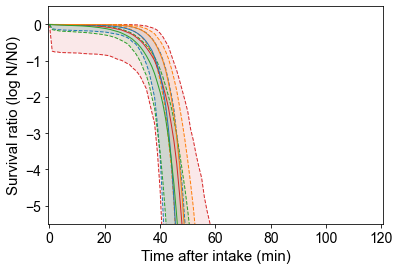

In [11]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0]*60, logSg0_quantile[:,0], logSg0_quantile[:,2], facecolor=Palette[3], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0]*60, logSg0_quantile[:,0], lw=1, color=Palette[3],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_27_quantile[:,0], logSg0_27_quantile[:,2], facecolor=Palette[0], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0]*60, logSg0_27_quantile[:,0], lw=1, color=Palette[0],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_42_quantile[:,0], logSg0_42_quantile[:,2], facecolor=Palette[1], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0]*60, logSg0_42_quantile[:,0], lw=1, color=Palette[1],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_48_quantile[:,0], logSg0_48_quantile[:,2], facecolor=Palette[2], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0]*60, logSg0_48_quantile[:,0], lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0]*60, logSg0_quantile[:,1], lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_27_quantile[:,1], lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_42_quantile[:,1], lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_48_quantile[:,1], lw=1, color=Palette[2], label="Survival ratio")

plt.ylabel("Survival ratio (log N/N0)", size=15, fontname="Arial")
plt.xlabel("Time after intake (min)",size=15,fontname="Arial")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 120.5)
plt.ylim(-5.5, 0.5)
plt.show()

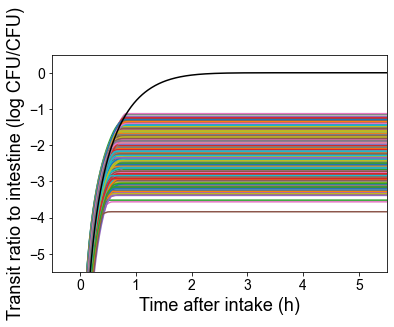

In [12]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_alpha_list = np.zeros((rep_eat, 1), dtype=float)
rcn_gastric_retention_beta_list = np.zeros((rep_eat, 1), dtype=float)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Solid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Solid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Solid_retention["beta"][rcn_gastric_retention]
    rcn_gastric_retention_alpha_list[q, 0] = alpha
    rcn_gastric_retention_beta_list[q, 0] = beta
    
    
    
    for i in range(len(x)):
        if i == 0:
            Ni[i, 0] = 0
            Ni_27[i, 0] = 0
            Ni_42[i, 0] = 0
            Ni_48[i, 0] = 0
        else:
            Sg = 10**logSg_using[i]
            Sg_27 = 10**logSg_27_using[i]
            Sg_42 = 10**logSg_42_using[i]
            Sg_48 = 10**logSg_48_using[i]
        
            dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_t = Ni_t + dNi
            Ni[i, 0] = Ni_t
        
            dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_27_t = Ni_27_t + dNi_27
            Ni_27[i, 0] = Ni_27_t
        
            dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_42_t = Ni_42_t + dNi_42
            Ni_42[i, 0] = Ni_42_t

            dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_48_t = Ni_48_t + dNi_48
            Ni_48[i, 0] = Ni_48_t

            dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Total_t = Total_t + dTotal
            Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [13]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

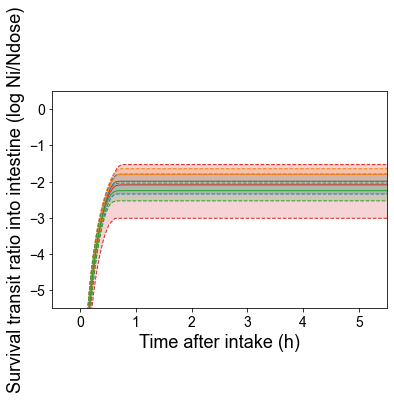

In [14]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

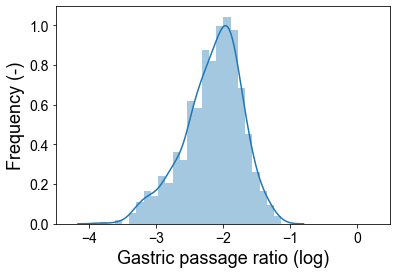

In [15]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [16]:
def rk4 ( y, t, h, f ):
    k1 = h * f( y, t )
    k2 = h * f( y + k1/2, t + h/2 )
    k3 = h * f( y + k2/2, t + h/2 )
    k4 = h * f( y + k3, t + h )
    return  y + ( k1 + 2*k2 + 2*k3 + k4 )/6, t + h

In [17]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.zeros((1, rep_eat), dtype=float)
colonic_filling_list = np.zeros((1, rep_eat), dtype=float)

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)

Nc_27 = np.zeros((rep_eat, 1), dtype=float)
Nc_42 = np.zeros((rep_eat, 1), dtype=float)
Nc_48 = np.zeros((rep_eat, 1), dtype=float)

In [18]:
Nc_min_27_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_42_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_48_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
warnings.simplefilter('ignore', RuntimeWarning)
for n in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    
    rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
    rcn_colonic_filling_list[n] = rcn
    rcn = random.randrange(len(samples_27["LogNmax"]))
    rcn_invasion_list[n] = rcn
    
    logdose[0,n] = np.random.uniform(low=-2,high=6,size=1)[0]
    
    t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn_colonic_filling_list[n, 0]],
                                        1/samples_Colonic_filling["beta"][rcn_colonic_filling_list[n, 0]])))
    t = np.min((t,len(Ni_min[:, 0])-1))
    colonic_filling_list[0, n] = t
        
    LogNmax_27 = samples_27["LogNmax"][rcn_invasion_list[n]]
    Logmu_27 = samples_27["Logmu"][rcn_invasion_list[n]]
    sigma_27 = samples_27["sigma"][rcn_invasion_list[n]]
    Nmax_27 = 10**LogNmax_27
    mu_27 = 10**Logmu_27

    LogNmax_42 = samples_42["LogNmax"][rcn_invasion_list[n]]
    Logmu_42 = samples_42["Logmu"][rcn_invasion_list[n]]
    sigma_42 = samples_42["sigma"][rcn_invasion_list[n]]
    Nmax_42 = 10**LogNmax_42
    mu_42 = 10**Logmu_42

    LogNmax_48 = samples_48["LogNmax"][rcn_invasion_list[n]]
    Logmu_48 = samples_48["Logmu"][rcn_invasion_list[n]]
    sigma_48 = samples_48["sigma"][rcn_invasion_list[n]]
    Nmax_48 = 10**LogNmax_48
    mu_48 = 10**Logmu_48

    for i in range(len(Ni_min[:, 0])):
        
        Ni = Ni_min[i, n]*10**logdose[0,n]
        Ni_27 = Ni_27_min[i, n]*10**logdose[0,n]
        Ni_42 = Ni_42_min[i, n]*10**logdose[0,n]
        Ni_48 = Ni_48_min[i, n]*10**logdose[0,n]
            
        T = i/60
        h = 1/60
    
        def ODE_27 (y, t):
            return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

        def ODE_42 (y, t):
            return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

        def ODE_48 (y, t):
            return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
        if i==0:
            Nc_min_27[i, n] = 0
            Nc_min_42[i, n] = 0
            Nc_min_48[i, n] = 0
                
        else:
                
            Nc_min_mean_27[i, n] = rk4 ( Nc_min_mean_27[i-1, n], h, T-h, ODE_27)[0]
            Nc_min_27[i, n] = Nc_min_mean_27[i, n]
        
            Nc_min_mean_42[i, n] = rk4 ( Nc_min_mean_42[i-1, n], h, T-h, ODE_42)[0]
            Nc_min_42[i, n] = Nc_min_mean_42[i, n]
        
            Nc_min_mean_48[i, n] = rk4 ( Nc_min_mean_48[i-1, n], h, T-h, ODE_48)[0]
            Nc_min_48[i, n] = Nc_min_mean_48[i, n]

        
    
        
        
    Nc_min_27_list[1,n]= Nc_min_27[t,n]
    Nc_27[n, 0]  = Nc_min_27[t,n]
    ratio_27 = Nc_min_27[t,n]/10**logdose[0,n]    
    P_invasion_27 =  1- (1-ratio_27)**(10**logdose[0,n])
    P_invasion_27_mcmc[0,n] = P_invasion_27
        
    Nc_min_42_list[1,n]= Nc_min_42[t,n]
    Nc_42[n, 0]  = Nc_min_42[t,n]
    ratio_42 = Nc_min_42[t,n]/10**logdose[0,n]    
    P_invasion_42 =  1- (1-ratio_42)**(10**logdose[0,n])
    P_invasion_42_mcmc[0,n] = P_invasion_42
        
    Nc_min_48_list[1,n]= Nc_min_48[t,n]
    Nc_48[n, 0]  = Nc_min_48[t,n]
    ratio_48 = Nc_min_48[t,n]/10**logdose[0,n]    
    P_invasion_48 =  1- (1-ratio_48)**(10**logdose[0,n])
    P_invasion_48_mcmc[0,n] = P_invasion_48
    
    

In [19]:
print(Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n])

4399.598848885429 4399.598848885429 4399.598848885429


In [20]:
rcn_gastric_retention_list

array([[5670],
       [8934],
       [5053],
       [8022],
       [6186],
       [4533],
       [2323],
       [3266],
       [6268],
       [9222],
       [3551],
       [7540],
       [8248],
       [9319],
       [5536],
       [8633],
       [2780],
       [6686],
       [2831],
       [1521],
       [ 754],
       [1438],
       [2643],
       [8233],
       [4866],
       [9140],
       [9436],
       [7551],
       [ 252],
       [3462],
       [9517],
       [8130],
       [7661],
       [9982],
       [5549],
       [4982],
       [7261],
       [3708],
       [ 762],
       [1175],
       [4154],
       [ 314],
       [2782],
       [6309],
       [3121],
       [6752],
       [6183],
       [5451],
       [8560],
       [6797],
       [6478],
       [7647],
       [9665],
       [9465],
       [6055],
       [ 456],
       [7573],
       [8922],
       [ 554],
       [4807],
       [4190],
       [2381],
       [4820],
       [5268],
       [7325],
       [6436],
       [31

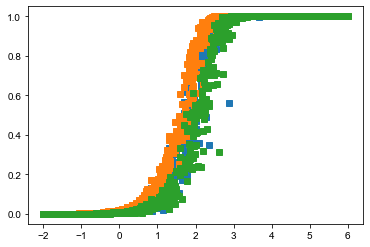

In [21]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.plot(logdose[0,:],P_invasion_42_mcmc[0,:],lw=0, marker="s",color=Palette[1])
plt.plot(logdose[0,:],P_invasion_48_mcmc[0,:],lw=0, marker="s",color=Palette[2])
plt.show()

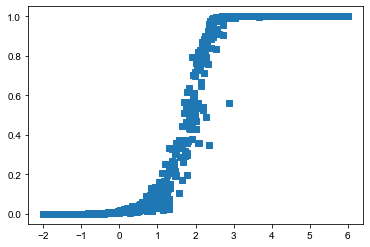

In [22]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.show()

In [23]:
pH_Lowest_list[:,0]

array([1.58609141, 1.59250798, 1.5853    , 1.57733055, 1.58343301,
       1.59501879, 1.61478005, 1.60390765, 1.62402026, 1.60920656,
       1.58284284, 1.61595354, 1.60376365, 1.61982807, 1.6184966 ,
       1.59730595, 1.57800895, 1.60480217, 1.58146801, 1.61468857,
       1.61977033, 1.61407663, 1.56886293, 1.61751236, 1.6047484 ,
       1.54752022, 1.56806874, 1.55347351, 1.58461444, 1.6263043 ,
       1.58083345, 1.60555483, 1.58311944, 1.60848014, 1.59334846,
       1.61205414, 1.64550974, 1.57364707, 1.62992919, 1.57803949,
       1.65010409, 1.6001917 , 1.60824957, 1.61338899, 1.64070237,
       1.59252947, 1.6309138 , 1.61670499, 1.58079686, 1.60589652,
       1.60021919, 1.6030778 , 1.61844009, 1.63259578, 1.57659181,
       1.5828291 , 1.57295643, 1.59663654, 1.5928269 , 1.62352872,
       1.59263697, 1.58805628, 1.6119943 , 1.61527777, 1.65378131,
       1.60274105, 1.60855342, 1.59121628, 1.53640244, 1.59562059,
       1.60075484, 1.6252946 , 1.53597981, 1.57972707, 1.57859

In [24]:

pH_mean = np.zeros((rep_eat, 1), dtype=float)
pH_mean_50 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_25 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_10 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_1 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_48 = np.zeros((rep_eat, 1), dtype=float)
logSg0_mean = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_48 = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_alpha = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_beta = np.zeros((rep_eat, 1), dtype=float)
colonic_filling = np.zeros((rep_eat, 1), dtype=float)
Prob_27 = np.zeros((rep_eat, 1), dtype=float)
Prob_42 = np.zeros((rep_eat, 1), dtype=float)
Prob_48 = np.zeros((rep_eat, 1), dtype=float)

rcn_gastric_retention_list

for i in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    stomach_reduction_a_27[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_b_27[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_e_27[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_f_27[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_a_42[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_b_42[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_e_42[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_f_42[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_a_48[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_b_48[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_e_48[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_f_48[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 8]
    logSg0_mean[i, 0] = np.mean(logSg0_list[:, i])
    invasion_LogNmax_27[i, 0] = samples_27["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_27[i, 0] = samples_27["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_27[i, 0] = samples_27["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_42[i, 0] = samples_42["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_42[i, 0] = samples_42["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_42[i, 0] = samples_42["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_48[i, 0] = samples_48["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_48[i, 0] = samples_48["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_48[i, 0] = samples_48["sigma"][int(rcn_invasion_list[i, 0])]
    
    colonic_filling_alpha[i, 0] = samples_Colonic_filling["alpha"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling_beta[i, 0] = samples_Colonic_filling["beta"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling[i, 0] = colonic_filling_list[0,i]/60
    Prob_27[i, 0] = P_invasion_27_mcmc[0,i]
    Prob_42[i, 0] = P_invasion_42_mcmc[0,i]
    Prob_48[i, 0] = P_invasion_48_mcmc[0,i]
    

In [25]:
Sensitivity_df_27_young_solid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_27_list[:, 0],
                                              'stomach_reduction_b': reduction_b_27_list[:, 0],
                                              'stomach_reduction_e': reduction_e_27_list[:, 0],
                                              'stomach_reduction_f': reduction_f_27_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_27[:, 0],
                                              'invasion_Logmu': invasion_Logmu_27[:, 0],
                                              'Nc': np.log10(Nc_27)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 25.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 1.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 1.)[:, 0],
                                              'Invasion Probability' : Prob_27[:,0]})

In [26]:
Sensitivity_df_42_young_solid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_42_list[:, 0],
                                              'stomach_reduction_b': reduction_b_42_list[:, 0],
                                              'stomach_reduction_e': reduction_e_42_list[:, 0],
                                              'stomach_reduction_f': reduction_f_42_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_42[:, 0],
                                              'invasion_Logmu': invasion_Logmu_42[:, 0],
                                              'Nc': np.log10(Nc_42)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 25.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 1.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 3.)[:, 0],
                                              'Invasion Probability' : Prob_42[:,0]})

In [27]:
Sensitivity_df_48_young_solid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_48_list[:, 0],
                                              'stomach_reduction_b': reduction_b_48_list[:, 0],
                                              'stomach_reduction_e': reduction_e_48_list[:, 0],
                                              'stomach_reduction_f': reduction_f_48_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_48[:, 0],
                                              'invasion_Logmu': invasion_Logmu_48[:, 0],
                                              'Nc': np.log10(Nc_48)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 25.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 1.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 2.)[:, 0],
                                              'Invasion Probability' : Prob_48[:,0]})

In [28]:
Sensitivity_df_young_solid = pd.concat([Sensitivity_df_27_young_solid,Sensitivity_df_42_young_solid,Sensitivity_df_48_young_solid])

In [29]:
Sensitivity_df_young_solid

LogDose   pH min.       pH0      pH k  pH sigma  stomach_reduction_a  \
0    5.286654  1.586091  3.282970  0.000225  0.547653             4.139838   
1    0.362936  1.592508  3.292508  0.000226  0.537041             4.543806   
2   -0.513041  1.585300  3.243771  0.000221  0.538012             5.225594   
3    4.451095  1.577331  3.251955  0.000216  0.542565             5.780370   
4    0.356919  1.583433  3.284796  0.000224  0.535380             4.262231   
..        ...       ...       ...       ...       ...                  ...   
995  5.040307  1.620858  3.267098  0.000231  0.539911             4.775932   
996  5.568175  1.583323  3.290128  0.000228  0.544186             4.972133   
997 -1.079684  1.602225  3.284029  0.000227  0.543194             5.160631   
998 -1.377797  1.579350  3.264638  0.000222  0.532472             4.459200   
999  5.930056  1.539997  3.277814  0.000213  0.544179             4.370951   

     stomach_reduction_b  stomach_reduction_e  stomach_reduction_f  \
0             -10.635327            -0.312267             1.553604   
1             -12.414080            -0.410982             1.735412   
2             -15.111996            -0.157678             0.319375   
3             -17.227597            -0.105994             0.108510   
4             -11.090783            -0.523646             2.024845   
..                   ...                  ...                  ...   
995           -12.892721            -0.199186             0.965972   
996           -13.781083             0.095327             0.016955   
997           -14.460998            -0.084430             0.571772   
998           -12.582446            -0.573731             1.463130   
999           -11.744386            -0.854108             3.090915   

     Intestinal Survival Ratio  ...  invasion_LogNmax  invasion_Logmu  \
0                    -1.957576  ...          4.952582       -8.944099   
1                    -2.103228  ...          4.922785       -8.824828   
2                    -2.229834  ...          4.839656       -8.663811   
3                    -2.527361  ...          4.658858       -8.313675   
4                    -1.865625  ...          5.071394       -8.989597   
..                         ...  ...               ...             ...   
995                  -1.816448  ...          4.063157       -7.859873   
996                  -1.937755  ...          3.927315       -7.837154   
997                  -1.875733  ...          4.102097       -7.951300   
998                  -2.428434  ...          4.045955       -7.926267   
999                  -2.277747  ...          4.096753       -7.856147   

           Nc  colonic_filling_alpha  colonic_filling_beta  \
0    3.232233               8.531994              0.024432   
1   -1.844149               8.571850              0.024688   
2   -2.471107               9.663771              0.028273   
3    2.527688               9.681990              0.028591   
4   -1.527899               8.019322              0.023300   
..        ...                    ...                   ...   
995  2.844231               9.541200              0.027892   
996  3.345042               9.365208              0.027548   
997 -3.098720               8.319246              0.024591   
998 -3.515598              12.142822              0.035332   
999  3.524975               8.290844              0.023714   

     Intestinal Retention Time   Age  Food Type  Strain  Invasion Probability  
0                     3.050000  25.0        1.0     1.0              1.000000  
1                     4.033333  25.0        1.0     1.0              0.014259  
2                     6.333333  25.0        1.0     1.0              0.003393  
3                     3.916667  25.0        1.0     1.0              1.000000  
4                     8.133333  25.0        1.0     1.0              0.029409  
..                         ...   ...        ...     ...                   ...  
995                   7.533333  25.0        1.

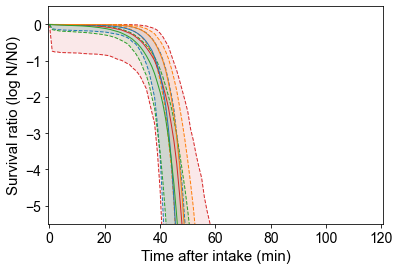

In [30]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0]*60, logSg0_quantile[:,0], logSg0_quantile[:,2], facecolor=Palette[3], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0]*60, logSg0_quantile[:,0], lw=1, color=Palette[3],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_27_quantile[:,0], logSg0_27_quantile[:,2], facecolor=Palette[0], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0]*60, logSg0_27_quantile[:,0], lw=1, color=Palette[0],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_42_quantile[:,0], logSg0_42_quantile[:,2], facecolor=Palette[1], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0]*60, logSg0_42_quantile[:,0], lw=1, color=Palette[1],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_48_quantile[:,0], logSg0_48_quantile[:,2], facecolor=Palette[2], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0]*60, logSg0_48_quantile[:,0], lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0]*60, logSg0_quantile[:,1], lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_27_quantile[:,1], lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_42_quantile[:,1], lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_48_quantile[:,1], lw=1, color=Palette[2], label="Survival ratio")

plt.ylabel("Survival ratio (log N/N0)", size=15, fontname="Arial")
plt.xlabel("Time after intake (min)",size=15,fontname="Arial")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 120.5)
plt.ylim(-5.5, 0.5)
plt.show()

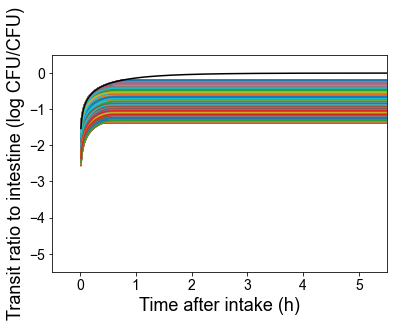

In [31]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_alpha_list = np.zeros((rep_eat, 1), dtype=float)
rcn_gastric_retention_beta_list = np.zeros((rep_eat, 1), dtype=float)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Liquid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Liquid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Liquid_retention["beta"][rcn_gastric_retention]
    rcn_gastric_retention_alpha_list[q, 0] = alpha
    rcn_gastric_retention_beta_list[q, 0] = beta
    
    
    
    for i in range(len(x)):
        if i == 0:
            Ni[i, 0] = 0
            Ni_27[i, 0] = 0
            Ni_42[i, 0] = 0
            Ni_48[i, 0] = 0
        else:
            Sg = 10**logSg_using[i]
            Sg_27 = 10**logSg_27_using[i]
            Sg_42 = 10**logSg_42_using[i]
            Sg_48 = 10**logSg_48_using[i]
        
            dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_t = Ni_t + dNi
            Ni[i, 0] = Ni_t
        
            dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_27_t = Ni_27_t + dNi_27
            Ni_27[i, 0] = Ni_27_t
        
            dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_42_t = Ni_42_t + dNi_42
            Ni_42[i, 0] = Ni_42_t

            dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_48_t = Ni_48_t + dNi_48
            Ni_48[i, 0] = Ni_48_t

            dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Total_t = Total_t + dTotal
            Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [32]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

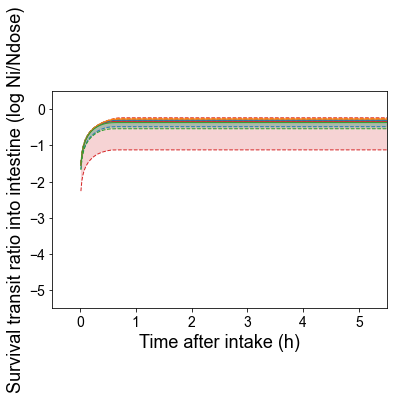

In [33]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

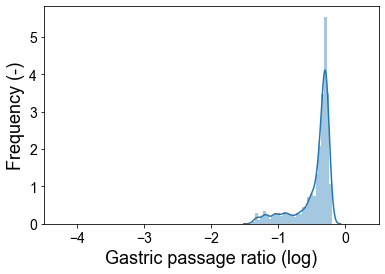

In [34]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [35]:
def rk4 ( y, t, h, f ):
    k1 = h * f( y, t )
    k2 = h * f( y + k1/2, t + h/2 )
    k3 = h * f( y + k2/2, t + h/2 )
    k4 = h * f( y + k3, t + h )
    return  y + ( k1 + 2*k2 + 2*k3 + k4 )/6, t + h

In [36]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.zeros((1, rep_eat), dtype=float)
colonic_filling_list = np.zeros((1, rep_eat), dtype=float)

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)

Nc_27 = np.zeros((rep_eat, 1), dtype=float)
Nc_42 = np.zeros((rep_eat, 1), dtype=float)
Nc_48 = np.zeros((rep_eat, 1), dtype=float)

In [37]:
Nc_min_27_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_42_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_48_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
warnings.simplefilter('ignore', RuntimeWarning)
for n in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    
    rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
    rcn_colonic_filling_list[n] = rcn
    rcn = random.randrange(len(samples_27["LogNmax"]))
    rcn_invasion_list[n] = rcn
    
    logdose[0,n] = np.random.uniform(low=-2,high=6,size=1)[0]
    
    t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn_colonic_filling_list[n, 0]],
                                        1/samples_Colonic_filling["beta"][rcn_colonic_filling_list[n, 0]])))
    t = np.min((t,len(Ni_min[:, 0])-1))
    colonic_filling_list[0, n] = t
        
    LogNmax_27 = samples_27["LogNmax"][rcn_invasion_list[n]]
    Logmu_27 = samples_27["Logmu"][rcn_invasion_list[n]]
    sigma_27 = samples_27["sigma"][rcn_invasion_list[n]]
    Nmax_27 = 10**LogNmax_27
    mu_27 = 10**Logmu_27

    LogNmax_42 = samples_42["LogNmax"][rcn_invasion_list[n]]
    Logmu_42 = samples_42["Logmu"][rcn_invasion_list[n]]
    sigma_42 = samples_42["sigma"][rcn_invasion_list[n]]
    Nmax_42 = 10**LogNmax_42
    mu_42 = 10**Logmu_42

    LogNmax_48 = samples_48["LogNmax"][rcn_invasion_list[n]]
    Logmu_48 = samples_48["Logmu"][rcn_invasion_list[n]]
    sigma_48 = samples_48["sigma"][rcn_invasion_list[n]]
    Nmax_48 = 10**LogNmax_48
    mu_48 = 10**Logmu_48

    for i in range(len(Ni_min[:, 0])):
        
        Ni = Ni_min[i, n]*10**logdose[0,n]
        Ni_27 = Ni_27_min[i, n]*10**logdose[0,n]
        Ni_42 = Ni_42_min[i, n]*10**logdose[0,n]
        Ni_48 = Ni_48_min[i, n]*10**logdose[0,n]
            
        T = i/60
        h = 1/60
    
        def ODE_27 (y, t):
            return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

        def ODE_42 (y, t):
            return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

        def ODE_48 (y, t):
            return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
        if i==0:
            Nc_min_27[i, n] = 0
            Nc_min_42[i, n] = 0
            Nc_min_48[i, n] = 0
                
        else:
                
            Nc_min_mean_27[i, n] = rk4 ( Nc_min_mean_27[i-1, n], h, T-h, ODE_27)[0]
            Nc_min_27[i, n] = Nc_min_mean_27[i, n]
        
            Nc_min_mean_42[i, n] = rk4 ( Nc_min_mean_42[i-1, n], h, T-h, ODE_42)[0]
            Nc_min_42[i, n] = Nc_min_mean_42[i, n]
        
            Nc_min_mean_48[i, n] = rk4 ( Nc_min_mean_48[i-1, n], h, T-h, ODE_48)[0]
            Nc_min_48[i, n] = Nc_min_mean_48[i, n]

        
    
        
        
    Nc_min_27_list[1,n]= Nc_min_27[t,n]
    Nc_27[n, 0]  = Nc_min_27[t,n]
    ratio_27 = Nc_min_27[t,n]/10**logdose[0,n]    
    P_invasion_27 =  1- (1-ratio_27)**(10**logdose[0,n])
    P_invasion_27_mcmc[0,n] = P_invasion_27
        
    Nc_min_42_list[1,n]= Nc_min_42[t,n]
    Nc_42[n, 0]  = Nc_min_42[t,n]
    ratio_42 = Nc_min_42[t,n]/10**logdose[0,n]    
    P_invasion_42 =  1- (1-ratio_42)**(10**logdose[0,n])
    P_invasion_42_mcmc[0,n] = P_invasion_42
        
    Nc_min_48_list[1,n]= Nc_min_48[t,n]
    Nc_48[n, 0]  = Nc_min_48[t,n]
    ratio_48 = Nc_min_48[t,n]/10**logdose[0,n]    
    P_invasion_48 =  1- (1-ratio_48)**(10**logdose[0,n])
    P_invasion_48_mcmc[0,n] = P_invasion_48
    
    

In [38]:
print(Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n])

45500.65093412155 45500.65093412155 45500.65093412155


In [39]:
rcn_gastric_retention_list

array([[9991],
       [5734],
       [7390],
       [7175],
       [9089],
       [3771],
       [7706],
       [6918],
       [9045],
       [6653],
       [6930],
       [1012],
       [2754],
       [8454],
       [1111],
       [3744],
       [2779],
       [6985],
       [4134],
       [1016],
       [8795],
       [3696],
       [ 176],
       [9749],
       [4814],
       [2826],
       [5332],
       [8101],
       [7969],
       [1092],
       [6739],
       [7650],
       [9052],
       [5445],
       [5498],
       [3322],
       [2028],
       [ 602],
       [5206],
       [9233],
       [1340],
       [3636],
       [4000],
       [4594],
       [3986],
       [2105],
       [1607],
       [2485],
       [ 304],
       [ 748],
       [3921],
       [8324],
       [1602],
       [5986],
       [9322],
       [3006],
       [9450],
       [8469],
       [9906],
       [7522],
       [ 409],
       [4743],
       [7930],
       [8635],
       [3387],
       [7928],
       [91

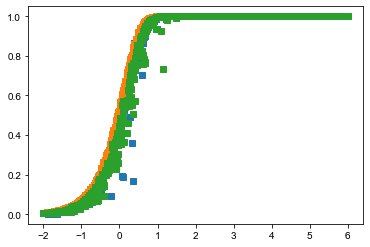

In [40]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.plot(logdose[0,:],P_invasion_42_mcmc[0,:],lw=0, marker="s",color=Palette[1])
plt.plot(logdose[0,:],P_invasion_48_mcmc[0,:],lw=0, marker="s",color=Palette[2])
plt.show()

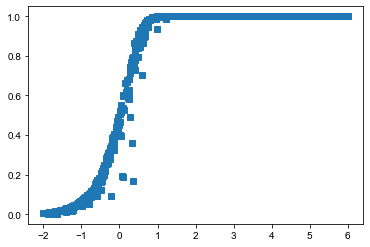

In [41]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.show()

In [42]:

pH_mean = np.zeros((rep_eat, 1), dtype=float)
pH_mean_50 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_25 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_10 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_1 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_48 = np.zeros((rep_eat, 1), dtype=float)
logSg0_mean = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_48 = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_alpha = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_beta = np.zeros((rep_eat, 1), dtype=float)
colonic_filling = np.zeros((rep_eat, 1), dtype=float)
Prob_27 = np.zeros((rep_eat, 1), dtype=float)
Prob_42 = np.zeros((rep_eat, 1), dtype=float)
Prob_48 = np.zeros((rep_eat, 1), dtype=float)

rcn_gastric_retention_list

for i in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    stomach_reduction_a_27[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_b_27[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_e_27[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_f_27[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_a_42[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_b_42[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_e_42[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_f_42[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_a_48[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_b_48[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_e_48[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_f_48[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 8]
    logSg0_mean[i, 0] = np.mean(logSg0_list[:, i])
    invasion_LogNmax_27[i, 0] = samples_27["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_27[i, 0] = samples_27["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_27[i, 0] = samples_27["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_42[i, 0] = samples_42["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_42[i, 0] = samples_42["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_42[i, 0] = samples_42["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_48[i, 0] = samples_48["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_48[i, 0] = samples_48["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_48[i, 0] = samples_48["sigma"][int(rcn_invasion_list[i, 0])]
    
    colonic_filling_alpha[i, 0] = samples_Colonic_filling["alpha"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling_beta[i, 0] = samples_Colonic_filling["beta"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling[i, 0] = colonic_filling_list[0,i]/60
    Prob_27[i, 0] = P_invasion_27_mcmc[0,i]
    Prob_42[i, 0] = P_invasion_42_mcmc[0,i]
    Prob_48[i, 0] = P_invasion_48_mcmc[0,i]
    

In [43]:
Sensitivity_df_27_young_liquid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_27_list[:, 0],
                                              'stomach_reduction_b': reduction_b_27_list[:, 0],
                                              'stomach_reduction_e': reduction_e_27_list[:, 0],
                                              'stomach_reduction_f': reduction_f_27_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_27[:, 0],
                                              'invasion_Logmu': invasion_Logmu_27[:, 0],
                                              'Nc': np.log10(Nc_27)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 25.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 0.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 1.)[:, 0],
                                              'Invasion Probability' : Prob_27[:,0]})

In [44]:
Sensitivity_df_42_young_liquid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_42_list[:, 0],
                                              'stomach_reduction_b': reduction_b_42_list[:, 0],
                                              'stomach_reduction_e': reduction_e_42_list[:, 0],
                                              'stomach_reduction_f': reduction_f_42_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_42[:, 0],
                                              'invasion_Logmu': invasion_Logmu_42[:, 0],
                                              'Nc': np.log10(Nc_42)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 25.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 0.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 3.)[:, 0],
                                              'Invasion Probability' : Prob_42[:,0]})

In [45]:
Sensitivity_df_48_young_liquid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_48_list[:, 0],
                                              'stomach_reduction_b': reduction_b_48_list[:, 0],
                                              'stomach_reduction_e': reduction_e_48_list[:, 0],
                                              'stomach_reduction_f': reduction_f_48_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_48[:, 0],
                                              'invasion_Logmu': invasion_Logmu_48[:, 0],
                                              'Nc': np.log10(Nc_48)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 25.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 0.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 2.)[:, 0],
                                              'Invasion Probability' : Prob_48[:,0]})

In [46]:
Sensitivity_df_young_liquid = pd.concat([Sensitivity_df_27_young_liquid,Sensitivity_df_42_young_liquid,Sensitivity_df_48_young_liquid])

In [47]:
Sensitivity_df_young_liquid

LogDose   pH min.       pH0      pH k  pH sigma  stomach_reduction_a  \
0    3.218131  1.586091  3.282970  0.000225  0.547653             4.139838   
1   -0.415922  1.592508  3.292508  0.000226  0.537041             4.543806   
2    3.909494  1.585300  3.243771  0.000221  0.538012             5.225594   
3   -0.275860  1.577331  3.251955  0.000216  0.542565             5.780370   
4   -1.073159  1.583433  3.284796  0.000224  0.535380             4.262231   
..        ...       ...       ...       ...       ...                  ...   
995 -1.233811  1.620858  3.267098  0.000231  0.539911             4.775932   
996  3.088777  1.583323  3.290128  0.000228  0.544186             4.972133   
997  0.656971  1.602225  3.284029  0.000227  0.543194             5.160631   
998  5.413860  1.579350  3.264638  0.000222  0.532472             4.459200   
999  5.055216  1.539997  3.277814  0.000213  0.544179             4.370951   

     stomach_reduction_b  stomach_reduction_e  stomach_reduction_f  \
0             -10.635327            -0.312267             1.553604   
1             -12.414080            -0.410982             1.735412   
2             -15.111996            -0.157678             0.319375   
3             -17.227597            -0.105994             0.108510   
4             -11.090783            -0.523646             2.024845   
..                   ...                  ...                  ...   
995           -12.892721            -0.199186             0.965972   
996           -13.781083             0.095327             0.016955   
997           -14.460998            -0.084430             0.571772   
998           -12.582446            -0.573731             1.463130   
999           -11.744386            -0.854108             3.090915   

     Intestinal Survival Ratio  ...  invasion_LogNmax  invasion_Logmu  \
0                    -0.311448  ...          5.007793       -8.882952   
1                    -0.318088  ...          4.927765       -8.591792   
2                    -0.375555  ...          5.079504       -8.970887   
3                    -0.416784  ...          4.906791       -8.632470   
4                    -0.314049  ...          5.292484       -9.217073   
..                         ...  ...               ...             ...   
995                  -0.296924  ...          3.876409       -7.681166   
996                  -0.304363  ...          4.037865       -7.809871   
997                  -0.297678  ...          3.997583       -7.834480   
998                  -0.534223  ...          4.112054       -7.915532   
999                  -0.422989  ...          4.062367       -7.823885   

           Nc  colonic_filling_alpha  colonic_filling_beta  \
0    2.881328               9.498255              0.027183   
1   -0.759010               7.889174              0.022878   
2    3.594128               8.141786              0.023407   
3   -0.570633               9.486327              0.027520   
4   -1.366840               9.240574              0.026587   
..        ...                    ...                   ...   
995 -1.595607               8.737067              0.025226   
996  2.707463               8.475932              0.024522   
997  0.316639               9.194828              0.026725   
998  5.061762               7.644880              0.022709   
999  4.680531               7.742549              0.022759   

     Intestinal Retention Time   Age  Food Type  Strain  Invasion Probability  
0                     4.600000  25.0        0.0     1.0              1.000000  
1                     8.350000  25.0        0.0     1.0              0.207158  
2                     4.950000  25.0        0.0     1.0              1.000000  
3                     5.516667  25.0        0.0     1.0              0.312710  
4                     4.700000  25.0        0.0     1.0              0.058257  
..                         ...   ...        ...     ...                   ...  
995                   6.850000  25.0        0.

In [48]:
# Color Difinition
Palette=sns.color_palette(n_colors = rep_eat)

#Max Time (h) 
Tmax = 15

##### Definition of Gastric passage log counts
logSg_list = []
logSg0_list = []
logSg0 = np.zeros((Tmax, 1), dtype=float)
logSg = np.zeros((Tmax, 1), dtype=float)
rcn_pH_list = np.zeros((rep_eat, 1), dtype=int)
rcn_stomach_reduction_list = np.zeros((rep_eat, 1), dtype=int)
rcn_colonic_filling_list = np.zeros((rep_eat, 1), dtype=int)
rcn_invasion_list = np.zeros((rep_eat, 1), dtype=int)
t_star = []
##### Simulation of Gastric passage log counts

# Color Difinition
Palette=sns.color_palette(n_colors = rep_eat)



#Difinition of time-array (h) 
x =  np.zeros((Tmax*60*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60*60+1)

##### Definition of Gastric passage log counts
logSg0_list = []
logSg0 = np.zeros((len(x), 1), dtype=float)
t_star = []

logSg0_27_list = []
logSg0_27 = np.zeros((len(x), 1), dtype=float)
t_star_27 = []

logSg0_42_list = []
logSg0_42 = np.zeros((len(x), 1), dtype=float)
t_star_42 = []

logSg0_48_list = []
logSg0_48 = np.zeros((len(x), 1), dtype=float)
t_star_48 = []

rcn_between_strain_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_27_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_42_list = np.zeros((rep_eat, 1), dtype=int)
rcn_each_strain_48_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)
rcn_pH_list = np.zeros((rep_eat, 1), dtype=int)
pH_Lowest_list = np.zeros((rep_eat, 1), dtype=float)
pH_A_list = np.zeros((rep_eat, 1), dtype=float)
pH_k_list = np.zeros((rep_eat, 1), dtype=float)
pH_sigma_list = np.zeros((rep_eat, 1), dtype=float)
reduction_a_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_27_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_27_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_42_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_42_list = np.zeros((rep_eat, 1), dtype=float)

reduction_a_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_b_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_e_48_list = np.zeros((rep_eat, 1), dtype=float)
reduction_f_48_list = np.zeros((rep_eat, 1), dtype=float)


##### Simulation of Gastric passage log counts
warnings.simplefilter('ignore', RuntimeWarning)
for i in tqdm(range(rep_eat), desc = 'Progress', leave = False):
    
    rcn_pH = random.choice(range(len(samples_pH_change_elder["lp__"])))
    rcn_pH_list[i, 0] = rcn_pH
    Lowest = samples_pH_change_elder["Lowest"][rcn_pH]
    A = samples_pH_change_elder["A"][rcn_pH]
    k = samples_pH_change_elder["k"][rcn_pH]
    sigma_pH = samples_pH_change_elder["sigma"][rcn_pH]
    
    pH_Lowest_list[i, 0] = samples_pH_change_elder["Lowest"][rcn_pH]
    pH_A_list[i, 0] = samples_pH_change_elder["A"][rcn_pH]
    pH_k_list[i, 0] = samples_pH_change_elder["k"][rcn_pH]
    pH_sigma_list[i, 0] = samples_pH_change_elder["sigma"][rcn_pH]
    
    

    rcn_between_strain = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_between_strain_list[i, 0] = rcn_between_strain
    abef0 = samples_between_strain["abef0"][rcn_between_strain]
    cov = samples_between_strain["cov"][rcn_between_strain]
    abef = np.random.multivariate_normal(abef0, cov, size = 1)[0]
    a = abef[0]
    b = abef[1]
    e = abef[2]
    f = abef[3]
    
    reduction_a_list[i,0] = a
    reduction_b_list[i,0] = b
    reduction_e_list[i,0] = e
    reduction_f_list[i,0] = f
    
    rcn_each_strain_27 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_27_list[i, 0] = rcn_each_strain_27
    
    a_27 = samples_between_strain["a"][rcn_between_strain, 2]
    b_27 = samples_between_strain["b"][rcn_between_strain, 2]
    e_27 = samples_between_strain["e"][rcn_between_strain, 2]
    f_27 = samples_between_strain["f"][rcn_between_strain, 2]
    
    reduction_a_27_list[i,0] = a
    reduction_b_27_list[i,0] = b
    reduction_e_27_list[i,0] = e
    reduction_f_27_list[i,0] = f
    
    rcn_each_strain_42 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_42_list[i, 0] = rcn_each_strain_42
    
    a_42 = samples_between_strain["a"][rcn_between_strain, 5]
    b_42 = samples_between_strain["b"][rcn_between_strain, 5]
    e_42 = samples_between_strain["e"][rcn_between_strain, 5]
    f_42 = samples_between_strain["f"][rcn_between_strain, 5]
    
    reduction_a_42_list[i,0] = a
    reduction_b_42_list[i,0] = b
    reduction_e_42_list[i,0] = e
    reduction_f_42_list[i,0] = f
    
    
    rcn_each_strain_48 = random.choice(range(len(samples_between_strain["lp__"])))
    rcn_each_strain_48_list[i, 0] = rcn_each_strain_48
    
    a_48 = samples_between_strain["a"][rcn_between_strain, 8]
    b_48 =  samples_between_strain["b"][rcn_between_strain, 8]
    e_48 =  samples_between_strain["e"][rcn_between_strain, 8]
    f_48 =  samples_between_strain["f"][rcn_between_strain, 8]
    
    reduction_a_48_list[i,0] = a
    reduction_b_48_list[i,0] = b
    reduction_e_48_list[i,0] = e
    reduction_f_48_list[i,0] = f
    
    # Predict log reduction from between strain model
    for t in range(len(x)):
        if t==0:
            logSg0[t] = 0
            logSg0_27[t] = 0
            logSg0_42[t] = 0
            logSg0_48[t] = 0
            pH_before = np.random.normal(Lowest+A*np.exp(-k*x[t, 0]*3600), sigma_pH)
        else :
            pH_next = np.random.normal(Lowest+A*np.exp(-k*x[t, 0]*3600), sigma_pH)
            pH = (pH_before + pH_next)/2
            pH_before = pH_next
            
            logd = (a*pH+b)
            logp = e*pH+f
            logdp = [logd, logp]
            
            logd_27 = (a_27*pH+b_27)
            logp_27 = e_27*pH+f_27
            logdp_27 = [logd_27, logp_27]
            
            logd_42 = (a_42*pH+b_42)
            logp_42 = e_42*pH+f_42
            logdp_42 = [logd_42, logp_42]
            
            logd_48 = (a_48*pH+b_48)
            logp_48 = e_48*pH+f_48
            logdp_48 = [logd_48, logp_48]
            
            d = np.exp(logdp[0])/60
            p = np.exp(logdp[1])
            t_star =  d*(-(logSg0[t-1]))**(1/p)
            logSg0[t] = -((t_star+(x[t]-x[t-1]))/d)**p
            
            d_27 = np.exp(logdp_27[0])/60
            p_27 = np.exp(logdp_27[1])
            t_star_27 =  d_27*(-(logSg0_27[t-1]))**(1/p_27)
            logSg0_27[t] = -((t_star_27+(x[t]-x[t-1]))/d_27)**p_27
            
            d_42 = np.exp(logdp_42[0])/60
            p_42 = np.exp(logdp_42[1])
            t_star_42 =  d_42*(-(logSg0_42[t-1]))**(1/p_42)
            logSg0_42[t] = -((t_star_42+(x[t]-x[t-1]))/d_42)**p_42
            
            d_48 = np.exp(logdp_48[0])/60
            p_48 = np.exp(logdp_48[1])
            t_star_48 =  d_48*(-(logSg0_48[t-1]))**(1/p_48)
            logSg0_48[t] = -((t_star_48+(x[t]-x[t-1]))/d_48)**p_48
    
    if i == 0:
        logSg0_list = logSg0
        logSg0_27_list = logSg0_27
        logSg0_42_list = logSg0_42
        logSg0_48_list = logSg0_48
    else:
        logSg0_list = np.concatenate([logSg0_list, logSg0], axis = -1) 
        logSg0_27_list = np.concatenate([logSg0_27_list, logSg0_27], axis = -1) 
        logSg0_42_list = np.concatenate([logSg0_42_list, logSg0_42], axis = -1) 
        logSg0_48_list = np.concatenate([logSg0_48_list, logSg0_48], axis = -1) 

In [49]:
x =  np.zeros((Tmax*60+1, 1), dtype=float)
x[:,0] = np.linspace(0, Tmax, Tmax*60+1)
logSg0_min = np.zeros((len(x), len(logSg0_list[0,:])), dtype=float)
logSg0_27_min = np.zeros((len(x), len(logSg0_27_list[0,:])), dtype=float)
logSg0_42_min = np.zeros((len(x), len(logSg0_42_list[0,:])), dtype=float)
logSg0_48_min = np.zeros((len(x), len(logSg0_48_list[0,:])), dtype=float)

for i in range(len(x)):
    logSg0_min[i,:] = logSg0_list[i*60,:]
    logSg0_27_min[i,:] = logSg0_27_list[i*60,:]
    logSg0_42_min[i,:] = logSg0_42_list[i*60,:]
    logSg0_48_min[i,:] = logSg0_48_list[i*60,:]

logSg0_list=logSg0_min
logSg0_min=0
logSg0_27_list=logSg0_27_min
logSg0_27_min=0
logSg0_42_list=logSg0_42_min
logSg0_42_min=0
logSg0_48_list=logSg0_48_min
logSg0_48_min=0

In [50]:
logSg0_quantile = np.zeros((len(logSg0_list[:,0]), 3), dtype=float)
logSg0_27_quantile = np.zeros((len(logSg0_27_list[:,0]), 3), dtype=float)
logSg0_42_quantile = np.zeros((len(logSg0_42_list[:,0]), 3), dtype=float)
logSg0_48_quantile = np.zeros((len(logSg0_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(logSg0_list[:,0])),desc='Progress', leave=False):
    logSg0_quantile[n,:] =  np.quantile(logSg0_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_27_quantile[n,:] =  np.quantile(logSg0_27_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_42_quantile[n,:] =  np.quantile(logSg0_42_list[n,:],[ 0.05, 0.5, 0.95])
    logSg0_48_quantile[n,:] =  np.quantile(logSg0_48_list[n,:],[ 0.05, 0.5, 0.95])

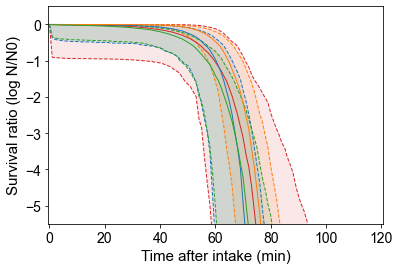

In [51]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0]*60, logSg0_quantile[:,0], logSg0_quantile[:,2], facecolor=Palette[3], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0]*60, logSg0_quantile[:,0], lw=1, color=Palette[3],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_27_quantile[:,0], logSg0_27_quantile[:,2], facecolor=Palette[0], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0]*60, logSg0_27_quantile[:,0], lw=1, color=Palette[0],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_42_quantile[:,0], logSg0_42_quantile[:,2], facecolor=Palette[1], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0]*60, logSg0_42_quantile[:,0], lw=1, color=Palette[1],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_48_quantile[:,0], logSg0_48_quantile[:,2], facecolor=Palette[2], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0]*60, logSg0_48_quantile[:,0], lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0]*60, logSg0_quantile[:,1], lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_27_quantile[:,1], lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_42_quantile[:,1], lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_48_quantile[:,1], lw=1, color=Palette[2], label="Survival ratio")

plt.ylabel("Survival ratio (log N/N0)", size=15, fontname="Arial")
plt.xlabel("Time after intake (min)",size=15,fontname="Arial")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 120.5)
plt.ylim(-5.5, 0.5)
plt.show()

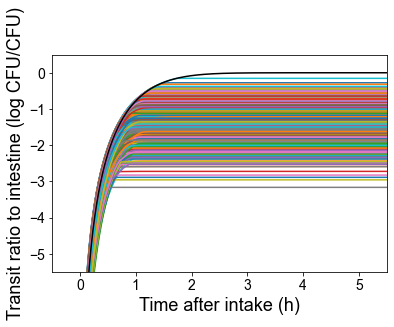

In [52]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_alpha_list = np.zeros((rep_eat, 1), dtype=float)
rcn_gastric_retention_beta_list = np.zeros((rep_eat, 1), dtype=float)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Solid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Solid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Solid_retention["beta"][rcn_gastric_retention]
    rcn_gastric_retention_alpha_list[q, 0] = alpha
    rcn_gastric_retention_beta_list[q, 0] = beta
    
    
    
    for i in range(len(x)):
        if i == 0:
            Ni[i, 0] = 0
            Ni_27[i, 0] = 0
            Ni_42[i, 0] = 0
            Ni_48[i, 0] = 0
        else:
            Sg = 10**logSg_using[i]
            Sg_27 = 10**logSg_27_using[i]
            Sg_42 = 10**logSg_42_using[i]
            Sg_48 = 10**logSg_48_using[i]
        
            dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_t = Ni_t + dNi
            Ni[i, 0] = Ni_t
        
            dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_27_t = Ni_27_t + dNi_27
            Ni_27[i, 0] = Ni_27_t
        
            dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_42_t = Ni_42_t + dNi_42
            Ni_42[i, 0] = Ni_42_t

            dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_48_t = Ni_48_t + dNi_48
            Ni_48[i, 0] = Ni_48_t

            dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Total_t = Total_t + dTotal
            Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [53]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

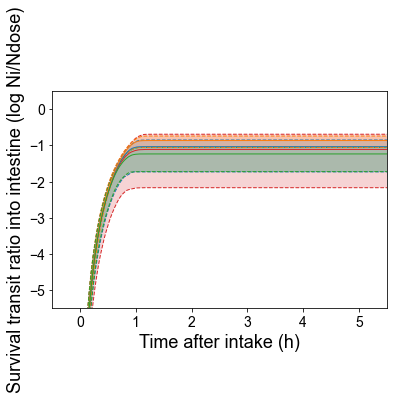

In [54]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

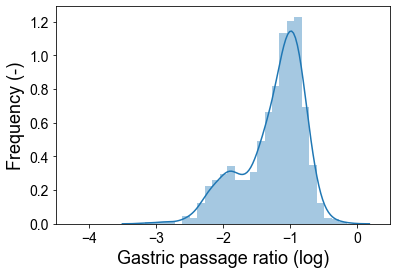

In [55]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [56]:
def rk4 ( y, t, h, f ):
    k1 = h * f( y, t )
    k2 = h * f( y + k1/2, t + h/2 )
    k3 = h * f( y + k2/2, t + h/2 )
    k4 = h * f( y + k3, t + h )
    return  y + ( k1 + 2*k2 + 2*k3 + k4 )/6, t + h

In [57]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.zeros((1, rep_eat), dtype=float)
colonic_filling_list = np.zeros((1, rep_eat), dtype=float)

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)

Nc_27 = np.zeros((rep_eat, 1), dtype=float)
Nc_42 = np.zeros((rep_eat, 1), dtype=float)
Nc_48 = np.zeros((rep_eat, 1), dtype=float)

In [58]:
Nc_min_27_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_42_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_48_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
warnings.simplefilter('ignore', RuntimeWarning)
for n in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    
    rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
    rcn_colonic_filling_list[n] = rcn
    rcn = random.randrange(len(samples_27["LogNmax"]))
    rcn_invasion_list[n] = rcn
    
    logdose[0,n] = np.random.uniform(low=-2,high=6,size=1)[0]
    
    t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn_colonic_filling_list[n, 0]],
                                        1/samples_Colonic_filling["beta"][rcn_colonic_filling_list[n, 0]])))
    t = np.min((t,len(Ni_min[:, 0])-1))
    colonic_filling_list[0, n] = t
        
    LogNmax_27 = samples_27["LogNmax"][rcn_invasion_list[n]]
    Logmu_27 = samples_27["Logmu"][rcn_invasion_list[n]]
    sigma_27 = samples_27["sigma"][rcn_invasion_list[n]]
    Nmax_27 = 10**LogNmax_27
    mu_27 = 10**Logmu_27

    LogNmax_42 = samples_42["LogNmax"][rcn_invasion_list[n]]
    Logmu_42 = samples_42["Logmu"][rcn_invasion_list[n]]
    sigma_42 = samples_42["sigma"][rcn_invasion_list[n]]
    Nmax_42 = 10**LogNmax_42
    mu_42 = 10**Logmu_42

    LogNmax_48 = samples_48["LogNmax"][rcn_invasion_list[n]]
    Logmu_48 = samples_48["Logmu"][rcn_invasion_list[n]]
    sigma_48 = samples_48["sigma"][rcn_invasion_list[n]]
    Nmax_48 = 10**LogNmax_48
    mu_48 = 10**Logmu_48

    for i in range(len(Ni_min[:, 0])):
        
        Ni = Ni_min[i, n]*10**logdose[0,n]
        Ni_27 = Ni_27_min[i, n]*10**logdose[0,n]
        Ni_42 = Ni_42_min[i, n]*10**logdose[0,n]
        Ni_48 = Ni_48_min[i, n]*10**logdose[0,n]
            
        T = i/60
        h = 1/60
    
        def ODE_27 (y, t):
            return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

        def ODE_42 (y, t):
            return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

        def ODE_48 (y, t):
            return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
        if i==0:
            Nc_min_27[i, n] = 0
            Nc_min_42[i, n] = 0
            Nc_min_48[i, n] = 0
                
        else:
                
            Nc_min_mean_27[i, n] = rk4 ( Nc_min_mean_27[i-1, n], h, T-h, ODE_27)[0]
            Nc_min_27[i, n] = Nc_min_mean_27[i, n]
        
            Nc_min_mean_42[i, n] = rk4 ( Nc_min_mean_42[i-1, n], h, T-h, ODE_42)[0]
            Nc_min_42[i, n] = Nc_min_mean_42[i, n]
        
            Nc_min_mean_48[i, n] = rk4 ( Nc_min_mean_48[i-1, n], h, T-h, ODE_48)[0]
            Nc_min_48[i, n] = Nc_min_mean_48[i, n]

        
    
        
        
    Nc_min_27_list[1,n]= Nc_min_27[t,n]
    Nc_27[n, 0]  = Nc_min_27[t,n]
    ratio_27 = Nc_min_27[t,n]/10**logdose[0,n]    
    P_invasion_27 =  1- (1-ratio_27)**(10**logdose[0,n])
    P_invasion_27_mcmc[0,n] = P_invasion_27
        
    Nc_min_42_list[1,n]= Nc_min_42[t,n]
    Nc_42[n, 0]  = Nc_min_42[t,n]
    ratio_42 = Nc_min_42[t,n]/10**logdose[0,n]    
    P_invasion_42 =  1- (1-ratio_42)**(10**logdose[0,n])
    P_invasion_42_mcmc[0,n] = P_invasion_42
        
    Nc_min_48_list[1,n]= Nc_min_48[t,n]
    Nc_48[n, 0]  = Nc_min_48[t,n]
    ratio_48 = Nc_min_48[t,n]/10**logdose[0,n]    
    P_invasion_48 =  1- (1-ratio_48)**(10**logdose[0,n])
    P_invasion_48_mcmc[0,n] = P_invasion_48
    
    

In [59]:
print(Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n])

14.185905507085751 14.185905507085751 14.185905507085751


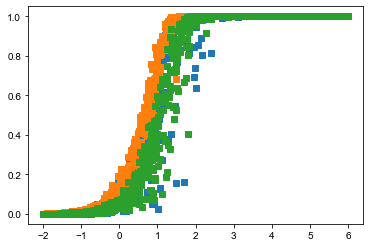

In [60]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.plot(logdose[0,:],P_invasion_42_mcmc[0,:],lw=0, marker="s",color=Palette[1])
plt.plot(logdose[0,:],P_invasion_48_mcmc[0,:],lw=0, marker="s",color=Palette[2])
plt.show()

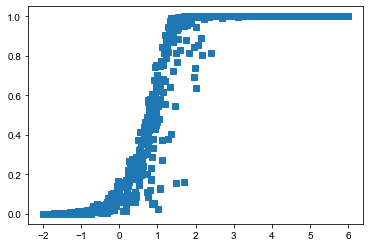

In [61]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.show()

In [62]:

pH_mean = np.zeros((rep_eat, 1), dtype=float)
pH_mean_50 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_25 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_10 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_1 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_48 = np.zeros((rep_eat, 1), dtype=float)
logSg0_mean = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_48 = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_alpha = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_beta = np.zeros((rep_eat, 1), dtype=float)
colonic_filling = np.zeros((rep_eat, 1), dtype=float)
Prob_27 = np.zeros((rep_eat, 1), dtype=float)
Prob_42 = np.zeros((rep_eat, 1), dtype=float)
Prob_48 = np.zeros((rep_eat, 1), dtype=float)

rcn_gastric_retention_list

for i in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    stomach_reduction_a_27[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_b_27[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_e_27[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_f_27[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_a_42[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_b_42[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_e_42[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_f_42[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_a_48[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_b_48[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_e_48[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_f_48[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 8]
    logSg0_mean[i, 0] = np.mean(logSg0_list[:, i])
    invasion_LogNmax_27[i, 0] = samples_27["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_27[i, 0] = samples_27["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_27[i, 0] = samples_27["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_42[i, 0] = samples_42["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_42[i, 0] = samples_42["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_42[i, 0] = samples_42["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_48[i, 0] = samples_48["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_48[i, 0] = samples_48["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_48[i, 0] = samples_48["sigma"][int(rcn_invasion_list[i, 0])]
    
    colonic_filling_alpha[i, 0] = samples_Colonic_filling["alpha"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling_beta[i, 0] = samples_Colonic_filling["beta"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling[i, 0] = colonic_filling_list[0,i]/60
    Prob_27[i, 0] = P_invasion_27_mcmc[0,i]
    Prob_42[i, 0] = P_invasion_42_mcmc[0,i]
    Prob_48[i, 0] = P_invasion_48_mcmc[0,i]
    

In [63]:
Sensitivity_df_27_elder_solid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_27_list[:, 0],
                                              'stomach_reduction_b': reduction_b_27_list[:, 0],
                                              'stomach_reduction_e': reduction_e_27_list[:, 0],
                                              'stomach_reduction_f': reduction_f_27_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_27[:, 0],
                                              'invasion_Logmu': invasion_Logmu_27[:, 0],
                                              'Nc': np.log10(Nc_27)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 71.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 1.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 1.)[:, 0],
                                              'Invasion Probability' : Prob_27[:,0]})

In [64]:
Sensitivity_df_42_elder_solid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_42_list[:, 0],
                                              'stomach_reduction_b': reduction_b_42_list[:, 0],
                                              'stomach_reduction_e': reduction_e_42_list[:, 0],
                                              'stomach_reduction_f': reduction_f_42_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_42[:, 0],
                                              'invasion_Logmu': invasion_Logmu_42[:, 0],
                                              'Nc': np.log10(Nc_42)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 71.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 1.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 3.)[:, 0],
                                              'Invasion Probability' : Prob_42[:,0]})

In [65]:
Sensitivity_df_48_elder_solid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_48_list[:, 0],
                                              'stomach_reduction_b': reduction_b_48_list[:, 0],
                                              'stomach_reduction_e': reduction_e_48_list[:, 0],
                                              'stomach_reduction_f': reduction_f_48_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_48[:, 0],
                                              'invasion_Logmu': invasion_Logmu_48[:, 0],
                                              'Nc': np.log10(Nc_48)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 71.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 1.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 2.)[:, 0],
                                              'Invasion Probability' : Prob_48[:,0]})

In [66]:
Sensitivity_df_elder_solid = pd.concat([Sensitivity_df_27_elder_solid,Sensitivity_df_42_elder_solid,Sensitivity_df_48_elder_solid])

In [67]:
Sensitivity_df_elder_solid

LogDose   pH min.       pH0      pH k  pH sigma  stomach_reduction_a  \
0   -1.261045  1.271485  3.999317  0.000117  0.741184             5.422052   
1    0.860362  1.195286  4.085733  0.000112  0.732301             4.969716   
2    4.808920  1.173750  4.131689  0.000110  0.739085             4.957738   
3    5.387125  1.164285  4.066467  0.000110  0.728400             4.801672   
4    2.799109  1.217941  4.078588  0.000113  0.741184             4.849514   
..        ...       ...       ...       ...       ...                  ...   
995  0.544977  1.213082  4.072350  0.000114  0.734906             5.003932   
996  0.831401  1.195671  4.091879  0.000112  0.736637             4.672473   
997  0.957174  1.159289  4.047810  0.000109  0.731141             5.428431   
998 -1.852497  1.230134  4.058464  0.000113  0.741919             4.486758   
999  2.189694  1.172423  4.071952  0.000109  0.739093             4.799436   

     stomach_reduction_b  stomach_reduction_e  stomach_reduction_f  \
0             -15.279679             0.053201             0.174450   
1             -15.580120            -1.335727             2.761591   
2             -14.006242            -0.701519             2.367041   
3             -14.796532            -1.745185             4.846411   
4             -12.227391             0.184734             0.469407   
..                   ...                  ...                  ...   
995           -13.865271             0.048286             0.302942   
996           -12.525533            -0.141099             0.941406   
997           -16.343806            -0.432604             0.707804   
998           -11.863087            -0.902310             3.504578   
999           -13.170663            -0.790245             2.641268   

     Intestinal Survival Ratio  ...  invasion_LogNmax  invasion_Logmu  \
0                    -2.189315  ...          4.900118       -8.847664   
1                    -2.190465  ...          4.883051       -8.946438   
2                    -1.171983  ...          4.923061       -8.861569   
3                    -2.282995  ...          4.922915       -8.938146   
4                    -0.516554  ...          4.977305       -8.849460   
..                         ...  ...               ...             ...   
995                  -0.893966  ...          4.007908       -7.835568   
996                  -0.776440  ...          4.095968       -7.953181   
997                  -1.854338  ...          4.046006       -7.878814   
998                  -1.353540  ...          3.942449       -7.831823   
999                  -1.497275  ...          4.024194       -7.835336   

           Nc  colonic_filling_alpha  colonic_filling_beta  \
0   -2.340185              10.013453              0.028625   
1   -0.219001               8.992013              0.026018   
2    3.915622               6.966610              0.020237   
3    4.282624               8.442690              0.024156   
4    1.768433              12.366931              0.036514   
..        ...                    ...                   ...   
995 -0.628141               7.899997              0.022981   
996 -0.498170              10.144555              0.029147   
997 -0.462971               6.828332              0.019361   
998 -3.648862               8.796410              0.025430   
999  0.956705               8.398962              0.023872   

     Intestinal Retention Time   Age  Food Type  Strain  Invasion Probability  
0                     7.633333  71.0        1.0     1.0              0.004759  
1                     6.033333  71.0        1.0     1.0              0.467723  
2                     7.383333  71.0        1.0     1.0              1.000000  
3                     9.766667  71.0        1.0     1.0              1.000000  
4                     4.933333  71.0        1.0     1.0              1.000000  
..                         ...   ...        ...     ...                   ...  
995                   5.483333  71.0        1.

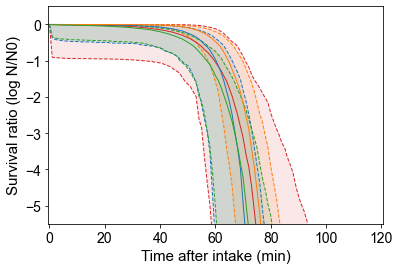

In [68]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0]*60, logSg0_quantile[:,0], logSg0_quantile[:,2], facecolor=Palette[3], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_quantile[:,2], lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0]*60, logSg0_quantile[:,0], lw=1, color=Palette[3],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_27_quantile[:,0], logSg0_27_quantile[:,2], facecolor=Palette[0], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_27_quantile[:,2], lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0]*60, logSg0_27_quantile[:,0], lw=1, color=Palette[0],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_42_quantile[:,0], logSg0_42_quantile[:,2], facecolor=Palette[1], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_42_quantile[:,2], lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0]*60, logSg0_42_quantile[:,0], lw=1, color=Palette[1],linestyle='--')
    
plt.fill_between(x[:,0]*60, logSg0_48_quantile[:,0], logSg0_48_quantile[:,2], facecolor=Palette[2], alpha=0.1)
plt.plot(x[:,0]*60, logSg0_48_quantile[:,2], lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0]*60, logSg0_48_quantile[:,0], lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0]*60, logSg0_quantile[:,1], lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_27_quantile[:,1], lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_42_quantile[:,1], lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0]*60, logSg0_48_quantile[:,1], lw=1, color=Palette[2], label="Survival ratio")

plt.ylabel("Survival ratio (log N/N0)", size=15, fontname="Arial")
plt.xlabel("Time after intake (min)",size=15,fontname="Arial")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(-0.5, 120.5)
plt.ylim(-5.5, 0.5)
plt.show()

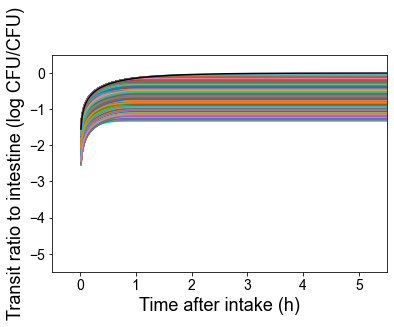

In [69]:
Ni_list = []
Ni_27_list = []
Ni_42_list = []
Ni_48_list = []

plt.rcParams["font.family"] = "Arial"

rcn_gastric_retention_list = np.zeros((rep_eat, 1), dtype=int)
rcn_gastric_retention_alpha_list = np.zeros((rep_eat, 1), dtype=float)
rcn_gastric_retention_beta_list = np.zeros((rep_eat, 1), dtype=float)

for q in tqdm(range(rep_eat),desc='Progress', leave=False):
    
    Ni = np.zeros((len(x), 1), dtype=float)
    dNi = []
    Ni_t = 0
    Ni_27 = np.zeros((len(x), 1), dtype=float)
    dNi_27 = []
    Ni_27_t = 0
    Ni_42 = np.zeros((len(x), 1), dtype=float)
    dNi_42 = []
    Ni_42_t = 0
    Ni_48 = np.zeros((len(x), 1), dtype=float)
    dNi_48 = []
    Ni_48_t = 0
    
    Total = np.zeros((len(x), 1), dtype=float)
    dTotal = []
    Total_t = 0
    
    logSg_using = logSg0_list[:, q]
    logSg_27_using = logSg0_27_list[:, q]
    logSg_42_using = logSg0_42_list[:, q]
    logSg_48_using = logSg0_48_list[:, q]
    
    rcn_gastric_retention = random.choice(range(len(samples_Liquid_retention["alpha"])))
    rcn_gastric_retention_list[q, 0] = rcn_gastric_retention
    alpha = samples_Liquid_retention["alpha"][rcn_gastric_retention]
    beta = samples_Liquid_retention["beta"][rcn_gastric_retention]
    rcn_gastric_retention_alpha_list[q, 0] = alpha
    rcn_gastric_retention_beta_list[q, 0] = beta
    
    
    
    for i in range(len(x)):
        if i == 0:
            Ni[i, 0] = 0
            Ni_27[i, 0] = 0
            Ni_42[i, 0] = 0
            Ni_48[i, 0] = 0
        else:
            Sg = 10**logSg_using[i]
            Sg_27 = 10**logSg_27_using[i]
            Sg_42 = 10**logSg_42_using[i]
            Sg_48 = 10**logSg_48_using[i]
        
            dNi = Sg*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_t = Ni_t + dNi
            Ni[i, 0] = Ni_t
        
            dNi_27 = Sg_27*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_27_t = Ni_27_t + dNi_27
            Ni_27[i, 0] = Ni_27_t
        
            dNi_42 = Sg_42*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_42_t = Ni_42_t + dNi_42
            Ni_42[i, 0] = Ni_42_t

            dNi_48 = Sg_48*gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Ni_48_t = Ni_48_t + dNi_48
            Ni_48[i, 0] = Ni_48_t

            dTotal = gamma.pdf(60*x[i], alpha, loc=0, scale=1./beta)
            Total_t = Total_t + dTotal
            Total[i, 0] = Total_t

    plt.plot(x[:,0], np.log10(Ni[:,0]), marker="", color=Palette[q])

    
    if q == 0:
        Ni_list = Ni
        Ni_27_list = Ni_27
        Ni_42_list = Ni_42
        Ni_48_list = Ni_48
    else:
        Ni_list = np.concatenate([Ni_list, Ni], axis = -1) 
        Ni_27_list = np.concatenate([Ni_27_list, Ni_27], axis = -1) 
        Ni_42_list = np.concatenate([Ni_42_list, Ni_42], axis = -1) 
        Ni_48_list = np.concatenate([Ni_48_list, Ni_48], axis = -1) 
    
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)

plt.plot(x[:,0], np.log10(Total[:,0]), marker="", color='black')

plt.ylabel("Transit ratio to intestine (log CFU/CFU)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.show()

In [70]:
Ni_quantile = np.zeros((len(Ni_list[:,0]), 3), dtype=float)
Ni_27_quantile = np.zeros((len(Ni_27_list[:,0]), 3), dtype=float)
Ni_42_quantile = np.zeros((len(Ni_42_list[:,0]), 3), dtype=float)
Ni_48_quantile = np.zeros((len(Ni_48_list[:,0]), 3), dtype=float)

for n in tqdm(range(len(Ni_list[:,0])),desc='Progress', leave=False):
    Ni_quantile[n,:] =  np.quantile(Ni_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_27_quantile[n,:] =  np.quantile(Ni_27_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_42_quantile[n,:] =  np.quantile(Ni_42_list[n,:],[ 0.05, 0.5, 0.95])
    Ni_48_quantile[n,:] =  np.quantile(Ni_48_list[n,:],[ 0.05, 0.5, 0.95])

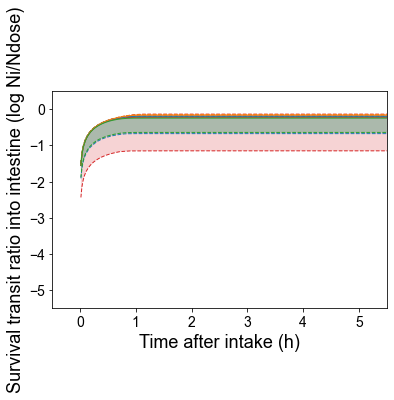

In [71]:
plt.rcParams["font.family"] = "Arial"

    
plt.fill_between(x[:,0], np.log10(Ni_quantile[:,0]), np.log10(Ni_quantile[:,2]), facecolor=Palette[3], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_27_quantile[:,0]), np.log10(Ni_27_quantile[:,2]), facecolor=Palette[0], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_42_quantile[:,0]), np.log10(Ni_42_quantile[:,2]), facecolor=Palette[1], alpha=0.2)
plt.fill_between(x[:,0], np.log10(Ni_48_quantile[:,0]), np.log10(Ni_48_quantile[:,2]), facecolor=Palette[2], alpha=0.2)
plt.plot(x[:,0], np.log10(Ni_quantile[:,2]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,2]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,2]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,2]), lw=1, color=Palette[2],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_quantile[:,0]), lw=1, color=Palette[3],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,0]), lw=1, color=Palette[0],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,0]), lw=1, color=Palette[1],linestyle='--')
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,0]), lw=1, color=Palette[2],linestyle='--')

plt.plot(x[:,0], np.log10(Ni_quantile[:,1]), lw=1, color=Palette[3], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_27_quantile[:,1]), lw=1, color=Palette[0], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_42_quantile[:,1]), lw=1, color=Palette[1], label="Survival ratio")
plt.plot(x[:,0], np.log10(Ni_48_quantile[:,1]), lw=1, color=Palette[2], label="Survival ratio")



plt.ylabel("Survival transit ratio into intestine (log Ni/Ndose)", size=18, fontname="Arial")
plt.xlabel("Time after intake (h)", size=18, fontname="Arial")
plt.xlim(-0.5, 5.5)
plt.ylim(-5.5, 0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

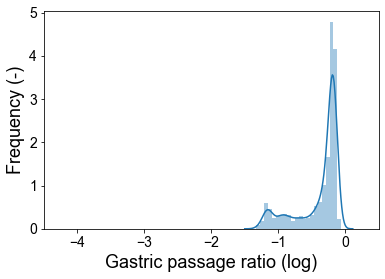

In [72]:
plt.rcParams["font.family"] = "Arial"
plt.xticks(size=14)
plt.yticks(size=14)
sns.distplot(np.log10(Ni_list)[-1,:])
plt.ylabel("Frequency (-)",size=18,fontname="Arial")
plt.xlabel("Gastric passage ratio (log)",size=18,fontname="Arial")
plt.xlim(-4.5, 0.5)
plt.show()

In [73]:
def rk4 ( y, t, h, f ):
    k1 = h * f( y, t )
    k2 = h * f( y + k1/2, t + h/2 )
    k3 = h * f( y + k2/2, t + h/2 )
    k4 = h * f( y + k3, t + h )
    return  y + ( k1 + 2*k2 + 2*k3 + k4 )/6, t + h

In [74]:
V = 319
Ni_min = Ni_list
Ni_27_min = Ni_27_list
Ni_42_min = Ni_42_list
Ni_48_min = Ni_48_list

Nc_min_mean = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_27 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_42 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

Nc_min_mean_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)
Nc_min_48 = np.zeros((len(Ni_min[:, 0]), len(Ni_min[0, :])), dtype=float)

logdose = np.zeros((1, rep_eat), dtype=float)
colonic_filling_list = np.zeros((1, rep_eat), dtype=float)

S = 32*10**4

P_invasion_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_mean = np.zeros((len(logdose),1), dtype=float)
ratio_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_27_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_27_mean = np.zeros((len(logdose),1), dtype=float)
ratio_27_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)

P_invasion_42_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_42_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_42_mean = np.zeros((len(logdose),1), dtype=float)

P_invasion_48_mcmc = np.zeros((len(logdose), len(Ni_min[0,:])), dtype=float)
P_invasion_48_quantile = np.zeros((len(logdose), 7), dtype=float)
P_invasion_48_mean = np.zeros((len(logdose),1), dtype=float)

Nc_27 = np.zeros((rep_eat, 1), dtype=float)
Nc_42 = np.zeros((rep_eat, 1), dtype=float)
Nc_48 = np.zeros((rep_eat, 1), dtype=float)

In [75]:
Nc_min_27_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_42_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
Nc_min_48_list = np.zeros((len(Ni_min[:,0]), rep_eat), dtype=float)
warnings.simplefilter('ignore', RuntimeWarning)
for n in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    
    rcn = random.choice(range(len(samples_Colonic_filling["alpha"])))
    rcn_colonic_filling_list[n] = rcn
    rcn = random.randrange(len(samples_27["LogNmax"]))
    rcn_invasion_list[n] = rcn
    
    logdose[0,n] = np.random.uniform(low=-2,high=6,size=1)[0]
    
    t = int(round(np.random.gamma(samples_Colonic_filling["alpha"][rcn_colonic_filling_list[n, 0]],
                                        1/samples_Colonic_filling["beta"][rcn_colonic_filling_list[n, 0]])))
    t = np.min((t,len(Ni_min[:, 0])-1))
    colonic_filling_list[0, n] = t
        
    LogNmax_27 = samples_27["LogNmax"][rcn_invasion_list[n]]
    Logmu_27 = samples_27["Logmu"][rcn_invasion_list[n]]
    sigma_27 = samples_27["sigma"][rcn_invasion_list[n]]
    Nmax_27 = 10**LogNmax_27
    mu_27 = 10**Logmu_27

    LogNmax_42 = samples_42["LogNmax"][rcn_invasion_list[n]]
    Logmu_42 = samples_42["Logmu"][rcn_invasion_list[n]]
    sigma_42 = samples_42["sigma"][rcn_invasion_list[n]]
    Nmax_42 = 10**LogNmax_42
    mu_42 = 10**Logmu_42

    LogNmax_48 = samples_48["LogNmax"][rcn_invasion_list[n]]
    Logmu_48 = samples_48["Logmu"][rcn_invasion_list[n]]
    sigma_48 = samples_48["sigma"][rcn_invasion_list[n]]
    Nmax_48 = 10**LogNmax_48
    mu_48 = 10**Logmu_48

    for i in range(len(Ni_min[:, 0])):
        
        Ni = Ni_min[i, n]*10**logdose[0,n]
        Ni_27 = Ni_27_min[i, n]*10**logdose[0,n]
        Ni_42 = Ni_42_min[i, n]*10**logdose[0,n]
        Ni_48 = Ni_48_min[i, n]*10**logdose[0,n]
            
        T = i/60
        h = 1/60
    
        def ODE_27 (y, t):
            return mu_27*(Ni_27-y)*(S*Nmax_27 - y)/V

        def ODE_42 (y, t):
            return mu_42*(Ni_42-y)*(S*Nmax_42 - y)/V

        def ODE_48 (y, t):
            return mu_48*(Ni_48-y)*(S*Nmax_48 - y)/V
    
        if i==0:
            Nc_min_27[i, n] = 0
            Nc_min_42[i, n] = 0
            Nc_min_48[i, n] = 0
                
        else:
                
            Nc_min_mean_27[i, n] = rk4 ( Nc_min_mean_27[i-1, n], h, T-h, ODE_27)[0]
            Nc_min_27[i, n] = Nc_min_mean_27[i, n]
        
            Nc_min_mean_42[i, n] = rk4 ( Nc_min_mean_42[i-1, n], h, T-h, ODE_42)[0]
            Nc_min_42[i, n] = Nc_min_mean_42[i, n]
        
            Nc_min_mean_48[i, n] = rk4 ( Nc_min_mean_48[i-1, n], h, T-h, ODE_48)[0]
            Nc_min_48[i, n] = Nc_min_mean_48[i, n]

        
    
        
        
    Nc_min_27_list[1,n]= Nc_min_27[t,n]
    Nc_27[n, 0]  = Nc_min_27[t,n]
    ratio_27 = Nc_min_27[t,n]/10**logdose[0,n]    
    P_invasion_27 =  1- (1-ratio_27)**(10**logdose[0,n])
    P_invasion_27_mcmc[0,n] = P_invasion_27
        
    Nc_min_42_list[1,n]= Nc_min_42[t,n]
    Nc_42[n, 0]  = Nc_min_42[t,n]
    ratio_42 = Nc_min_42[t,n]/10**logdose[0,n]    
    P_invasion_42 =  1- (1-ratio_42)**(10**logdose[0,n])
    P_invasion_42_mcmc[0,n] = P_invasion_42
        
    Nc_min_48_list[1,n]= Nc_min_48[t,n]
    Nc_48[n, 0]  = Nc_min_48[t,n]
    ratio_48 = Nc_min_48[t,n]/10**logdose[0,n]    
    P_invasion_48 =  1- (1-ratio_48)**(10**logdose[0,n])
    P_invasion_48_mcmc[0,n] = P_invasion_48
    
    

In [76]:
print(Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n],
      Nc_min_mean_27[i, n])

0.05821040178492172 0.05821040178492172 0.05821040178492172


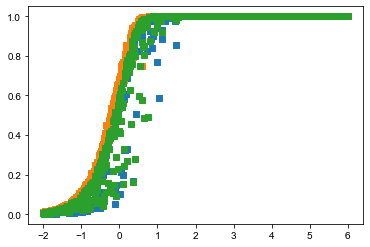

In [77]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.plot(logdose[0,:],P_invasion_42_mcmc[0,:],lw=0, marker="s",color=Palette[1])
plt.plot(logdose[0,:],P_invasion_48_mcmc[0,:],lw=0, marker="s",color=Palette[2])
plt.show()

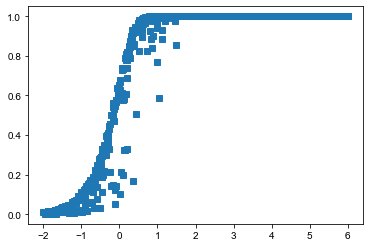

In [78]:
plt.plot(logdose[0,:],P_invasion_27_mcmc[0,:],lw=0, marker="s",color=Palette[0])
plt.show()

In [79]:

pH_mean = np.zeros((rep_eat, 1), dtype=float)
pH_mean_50 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_25 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_10 = np.zeros((rep_eat, 1), dtype=float)
pH_mean_1 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_27 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_42 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_a_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_b_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_e_48 = np.zeros((rep_eat, 1), dtype=float)
stomach_reduction_f_48 = np.zeros((rep_eat, 1), dtype=float)
logSg0_mean = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_27 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_42 = np.zeros((rep_eat, 1), dtype=float)
invasion_LogNmax_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_Logmu_48 = np.zeros((rep_eat, 1), dtype=float)
invasion_sigma_48 = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_alpha = np.zeros((rep_eat, 1), dtype=float)
colonic_filling_beta = np.zeros((rep_eat, 1), dtype=float)
colonic_filling = np.zeros((rep_eat, 1), dtype=float)
Prob_27 = np.zeros((rep_eat, 1), dtype=float)
Prob_42 = np.zeros((rep_eat, 1), dtype=float)
Prob_48 = np.zeros((rep_eat, 1), dtype=float)

rcn_gastric_retention_list

for i in tqdm(range(rep_eat) ,desc='Progress', leave=False):
    stomach_reduction_a_27[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_b_27[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_e_27[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_f_27[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 2]
    stomach_reduction_a_42[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_b_42[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_e_42[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_f_42[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 5]
    stomach_reduction_a_48[i, 0] = samples_between_strain["a"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_b_48[i, 0] = samples_between_strain["b"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_e_48[i, 0] = samples_between_strain["e"][int(rcn_stomach_reduction_list[i,0]), 8]
    stomach_reduction_f_48[i, 0] = samples_between_strain["f"][int(rcn_stomach_reduction_list[i,0]), 8]
    logSg0_mean[i, 0] = np.mean(logSg0_list[:, i])
    invasion_LogNmax_27[i, 0] = samples_27["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_27[i, 0] = samples_27["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_27[i, 0] = samples_27["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_42[i, 0] = samples_42["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_42[i, 0] = samples_42["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_42[i, 0] = samples_42["sigma"][int(rcn_invasion_list[i, 0])]
    invasion_LogNmax_48[i, 0] = samples_48["LogNmax"][int(rcn_invasion_list[i, 0])]
    invasion_Logmu_48[i, 0] = samples_48["Logmu"][int(rcn_invasion_list[i, 0])]
    invasion_sigma_48[i, 0] = samples_48["sigma"][int(rcn_invasion_list[i, 0])]
    
    colonic_filling_alpha[i, 0] = samples_Colonic_filling["alpha"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling_beta[i, 0] = samples_Colonic_filling["beta"][int(rcn_colonic_filling_list[i, 0])]
    colonic_filling[i, 0] = colonic_filling_list[0,i]/60
    Prob_27[i, 0] = P_invasion_27_mcmc[0,i]
    Prob_42[i, 0] = P_invasion_42_mcmc[0,i]
    Prob_48[i, 0] = P_invasion_48_mcmc[0,i]
    

In [80]:
Sensitivity_df_27_elder_liquid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_27_list[:, 0],
                                              'stomach_reduction_b': reduction_b_27_list[:, 0],
                                              'stomach_reduction_e': reduction_e_27_list[:, 0],
                                              'stomach_reduction_f': reduction_f_27_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_27[:, 0],
                                              'invasion_Logmu': invasion_Logmu_27[:, 0],
                                              'Nc': np.log10(Nc_27)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 71.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 0.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 1.)[:, 0],
                                              'Invasion Probability' : Prob_27[:,0]})

In [81]:
Sensitivity_df_42_elder_liquid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_42_list[:, 0],
                                              'stomach_reduction_b': reduction_b_42_list[:, 0],
                                              'stomach_reduction_e': reduction_e_42_list[:, 0],
                                              'stomach_reduction_f': reduction_f_42_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_42[:, 0],
                                              'invasion_Logmu': invasion_Logmu_42[:, 0],
                                              'Nc': np.log10(Nc_42)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 71.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 0.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 3.)[:, 0],
                                              'Invasion Probability' : Prob_42[:,0]})

In [82]:
Sensitivity_df_48_elder_liquid = pd.DataFrame({'LogDose' : logdose[0,:],
                                              'pH min.' : pH_Lowest_list[:,0],
                                              'pH0' : pH_A_list[:, 0],
                                              'pH k' : pH_k_list[:, 0],
                                              'pH sigma' : pH_sigma_list[:, 0],
                                              'stomach_reduction_a': reduction_a_48_list[:, 0],
                                              'stomach_reduction_b': reduction_b_48_list[:, 0],
                                              'stomach_reduction_e': reduction_e_48_list[:, 0],
                                              'stomach_reduction_f': reduction_f_48_list[:, 0],
                                              'Intestinal Survival Ratio': np.log10(Ni_list)[-1,:],
                                              'Gastric retention alpha': rcn_gastric_retention_alpha_list[:, 0],
                                              'Gastric retention beta': rcn_gastric_retention_beta_list[:, 0],
                                              'invasion_LogNmax': invasion_LogNmax_48[:, 0],
                                              'invasion_Logmu': invasion_Logmu_48[:, 0],
                                              'Nc': np.log10(Nc_48)[:, 0],
                                              'colonic_filling_alpha': colonic_filling_alpha[:, 0],
                                              'colonic_filling_beta': colonic_filling_beta[:, 0],
                                              'Intestinal Retention Time': colonic_filling[:, 0],
                                              'Age': np.full((rep_eat, 1), 71.)[:, 0],
                                              'Food Type': np.full((rep_eat, 1), 0.)[:, 0],
                                              'Strain':np.full((rep_eat, 1), 2.)[:, 0],
                                              'Invasion Probability' : Prob_48[:,0]})

In [83]:
Sensitivity_df_elder_liquid = pd.concat([Sensitivity_df_27_elder_liquid,Sensitivity_df_42_elder_liquid,Sensitivity_df_48_elder_liquid])

In [84]:
Sensitivity_df_elder_liquid

LogDose   pH min.       pH0      pH k  pH sigma  stomach_reduction_a  \
0    5.271286  1.271485  3.999317  0.000117  0.741184             5.422052   
1    0.920258  1.195286  4.085733  0.000112  0.732301             4.969716   
2    0.828584  1.173750  4.131689  0.000110  0.739085             4.957738   
3   -1.697110  1.164285  4.066467  0.000110  0.728400             4.801672   
4   -1.048237  1.217941  4.078588  0.000113  0.741184             4.849514   
..        ...       ...       ...       ...       ...                  ...   
995  1.528614  1.213082  4.072350  0.000114  0.734906             5.003932   
996 -1.955136  1.195671  4.091879  0.000112  0.736637             4.672473   
997 -1.419080  1.159289  4.047810  0.000109  0.731141             5.428431   
998  5.185135  1.230134  4.058464  0.000113  0.741919             4.486758   
999 -1.038876  1.172423  4.071952  0.000109  0.739093             4.799436   

     stomach_reduction_b  stomach_reduction_e  stomach_reduction_f  \
0             -15.279679             0.053201             0.174450   
1             -15.580120            -1.335727             2.761591   
2             -14.006242            -0.701519             2.367041   
3             -14.796532            -1.745185             4.846411   
4             -12.227391             0.184734             0.469407   
..                   ...                  ...                  ...   
995           -13.865271             0.048286             0.302942   
996           -12.525533            -0.141099             0.941406   
997           -16.343806            -0.432604             0.707804   
998           -11.863087            -0.902310             3.504578   
999           -13.170663            -0.790245             2.641268   

     Intestinal Survival Ratio  ...  invasion_LogNmax  invasion_Logmu  \
0                    -1.171255  ...          5.021765       -8.908136   
1                    -1.169781  ...          4.981467       -8.993725   
2                    -0.321696  ...          4.696177       -8.539496   
3                    -1.229520  ...          4.885019       -8.812200   
4                    -0.114384  ...          5.038729       -8.953678   
..                         ...  ...               ...             ...   
995                  -0.172410  ...          4.082305       -8.045545   
996                  -0.157517  ...          3.938496       -7.704729   
997                  -0.490641  ...          4.183639       -8.101340   
998                  -0.490509  ...          3.930040       -7.821509   
999                  -0.532734  ...          4.012317       -7.892944   

           Nc  colonic_filling_alpha  colonic_filling_beta  \
0    5.081749               8.338375              0.024526   
1    0.732457               8.810329              0.025951   
2    0.631670              10.007134              0.028705   
3   -1.935360               9.568882              0.027029   
4   -1.294861               8.753668              0.025228   
..        ...                    ...                   ...   
995  1.285337               9.479854              0.028292   
996 -2.239921               9.245613              0.027051   
997 -1.696630               9.060496              0.026268   
998  4.380258               8.277548              0.024033   
999 -1.271090               6.459355              0.018884   

     Intestinal Retention Time   Age  Food Type  Strain  Invasion Probability  
0                     4.033333  71.0        0.0     1.0              1.000000  
1                     7.450000  71.0        0.0     1.0              0.999835  
2                     4.466667  71.0        0.0     1.0              0.998886  
3                     5.066667  71.0        0.0     1.0              0.017169  
4                     8.166667  71.0        0.0     1.0              0.072115  
..                         ...   ...        ...     ...                   ...  
995                   7.266667  71.0        0.

In [85]:
Sensitivity_df = pd.concat([Sensitivity_df_young_solid, Sensitivity_df_young_liquid, Sensitivity_df_elder_solid, Sensitivity_df_elder_liquid])

In [97]:
Sensitivity_df = Sensitivity_df.rename(columns={'stomach_reduction_a': 'Stomach reduction a', 
                                                'stomach_reduction_b':'Stomach reduction b', 
                                                'stomach_reduction_e':'Stomach reduction e',
                                                'stomach_reduction_f':'Stomach reduction f', 
                                                'invasion_LogNmax':'Invasion LogNmax', 
                                                'invasion_Logmu':'Invasion ratio', 
                                                'invasion_sigma':'Invasion sigma', 
                                                'Nc':'Log N invading', 
                                                'colonic_filling_alpha':'Intestinal retention alpha', 
                                                'colonic_filling_beta':'Intestinal retention beta'})

In [118]:
Sensitivity_df = Sensitivity_df.rename(columns={'Log N invading'  : 'LogN invading' })

In [119]:
Sensitivity_df=Sensitivity_df.dropna(how='any')

In [120]:
Sensitivity_df

LogDose   pH min.       pH0      pH k  pH sigma  Stomach reduction a  \
0    5.286654  1.586091  3.282970  0.000225  0.547653             4.139838   
1    0.362936  1.592508  3.292508  0.000226  0.537041             4.543806   
2   -0.513041  1.585300  3.243771  0.000221  0.538012             5.225594   
3    4.451095  1.577331  3.251955  0.000216  0.542565             5.780370   
4    0.356919  1.583433  3.284796  0.000224  0.535380             4.262231   
..        ...       ...       ...       ...       ...                  ...   
995  1.528614  1.213082  4.072350  0.000114  0.734906             5.003932   
996 -1.955136  1.195671  4.091879  0.000112  0.736637             4.672473   
997 -1.419080  1.159289  4.047810  0.000109  0.731141             5.428431   
998  5.185135  1.230134  4.058464  0.000113  0.741919             4.486758   
999 -1.038876  1.172423  4.071952  0.000109  0.739093             4.799436   

     Stomach reduction b  Stomach reduction e  Stomach reduction f  \
0             -10.635327            -0.312267             1.553604   
1             -12.414080            -0.410982             1.735412   
2             -15.111996            -0.157678             0.319375   
3             -17.227597            -0.105994             0.108510   
4             -11.090783            -0.523646             2.024845   
..                   ...                  ...                  ...   
995           -13.865271             0.048286             0.302942   
996           -12.525533            -0.141099             0.941406   
997           -16.343806            -0.432604             0.707804   
998           -11.863087            -0.902310             3.504578   
999           -13.170663            -0.790245             2.641268   

     Intestinal Survival Ratio  ...  Invasion LogNmax  Invasion ratio  \
0                    -1.957576  ...          4.952582       -8.944099   
1                    -2.103228  ...          4.922785       -8.824828   
2                    -2.229834  ...          4.839656       -8.663811   
3                    -2.527361  ...          4.658858       -8.313675   
4                    -1.865625  ...          5.071394       -8.989597   
..                         ...  ...               ...             ...   
995                  -0.172410  ...          4.082305       -8.045545   
996                  -0.157517  ...          3.938496       -7.704729   
997                  -0.490641  ...          4.183639       -8.101340   
998                  -0.490509  ...          3.930040       -7.821509   
999                  -0.532734  ...          4.012317       -7.892944   

     LogN invading  Intestinal retention alpha  Intestinal retention beta  \
0         3.232233                    8.531994                   0.024432   
1        -1.844149                    8.571850                   0.024688   
2        -2.471107                    9.663771                   0.028273   
3         2.527688                    9.681990                   0.028591   
4        -1.527899                    8.019322                   0.023300   
..             ...                         ...                        ...   
995       1.285337                    9.479854                   0.028292   
996      -2.239921                    9.245613                   0.027051   
997      -1.696630                    9.060496                   0.026268   
998       4.380258                    8.277548                   0.024033   
999      -1.271090                    6.459355                   0.018884   

     Intestinal Retention Time   Age  Food Type  Strain  Invasion Probability  
0                     3.050000  25.0        1.0     1.0              1.000000  
1                     4.033333  25.0        1.0     1.0              0.014259  
2                     6.333333  25.0        1.0     1.0              0.003393  
3                     3.916667  25.0        1.0     1.0              1.000000  
4                     8.13

In [121]:
Sensitivity_df.corr(method="spearman")["Invasion Probability"]

LogDose                       0.905767
pH min.                      -0.059922
pH0                           0.070419
pH k                         -0.060089
pH sigma                      0.074154
Stomach reduction a           0.002429
Stomach reduction b          -0.009875
Stomach reduction e          -0.013118
Stomach reduction f           0.015702
Intestinal Survival Ratio     0.242699
Gastric retention alpha      -0.235081
Gastric retention beta       -0.238017
Invasion LogNmax              0.024658
Invasion ratio               -0.021260
LogN invading                 0.953069
Intestinal retention alpha    0.027476
Intestinal retention beta     0.027411
Intestinal Retention Time     0.007592
Age                           0.086778
Food Type                    -0.260161
Strain                        0.023105
Invasion Probability          1.000000
Name: Invasion Probability, dtype: float64

In [122]:
Sensitivity_corr = Sensitivity_df.corr(method="spearman")

In [123]:
Sensitivity_corr = Sensitivity_corr.reindex(Sensitivity_corr["Invasion Probability"].abs().sort_values().index)

In [124]:
Sensitivity_corr["Invasion Probability"]

Stomach reduction a           0.002429
Intestinal Retention Time     0.007592
Stomach reduction b          -0.009875
Stomach reduction e          -0.013118
Stomach reduction f           0.015702
Invasion ratio               -0.021260
Strain                        0.023105
Invasion LogNmax              0.024658
Intestinal retention beta     0.027411
Intestinal retention alpha    0.027476
pH min.                      -0.059922
pH k                         -0.060089
pH0                           0.070419
pH sigma                      0.074154
Age                           0.086778
Gastric retention alpha      -0.235081
Gastric retention beta       -0.238017
Intestinal Survival Ratio     0.242699
Food Type                    -0.260161
LogDose                       0.905767
LogN invading                 0.953069
Invasion Probability          1.000000
Name: Invasion Probability, dtype: float64

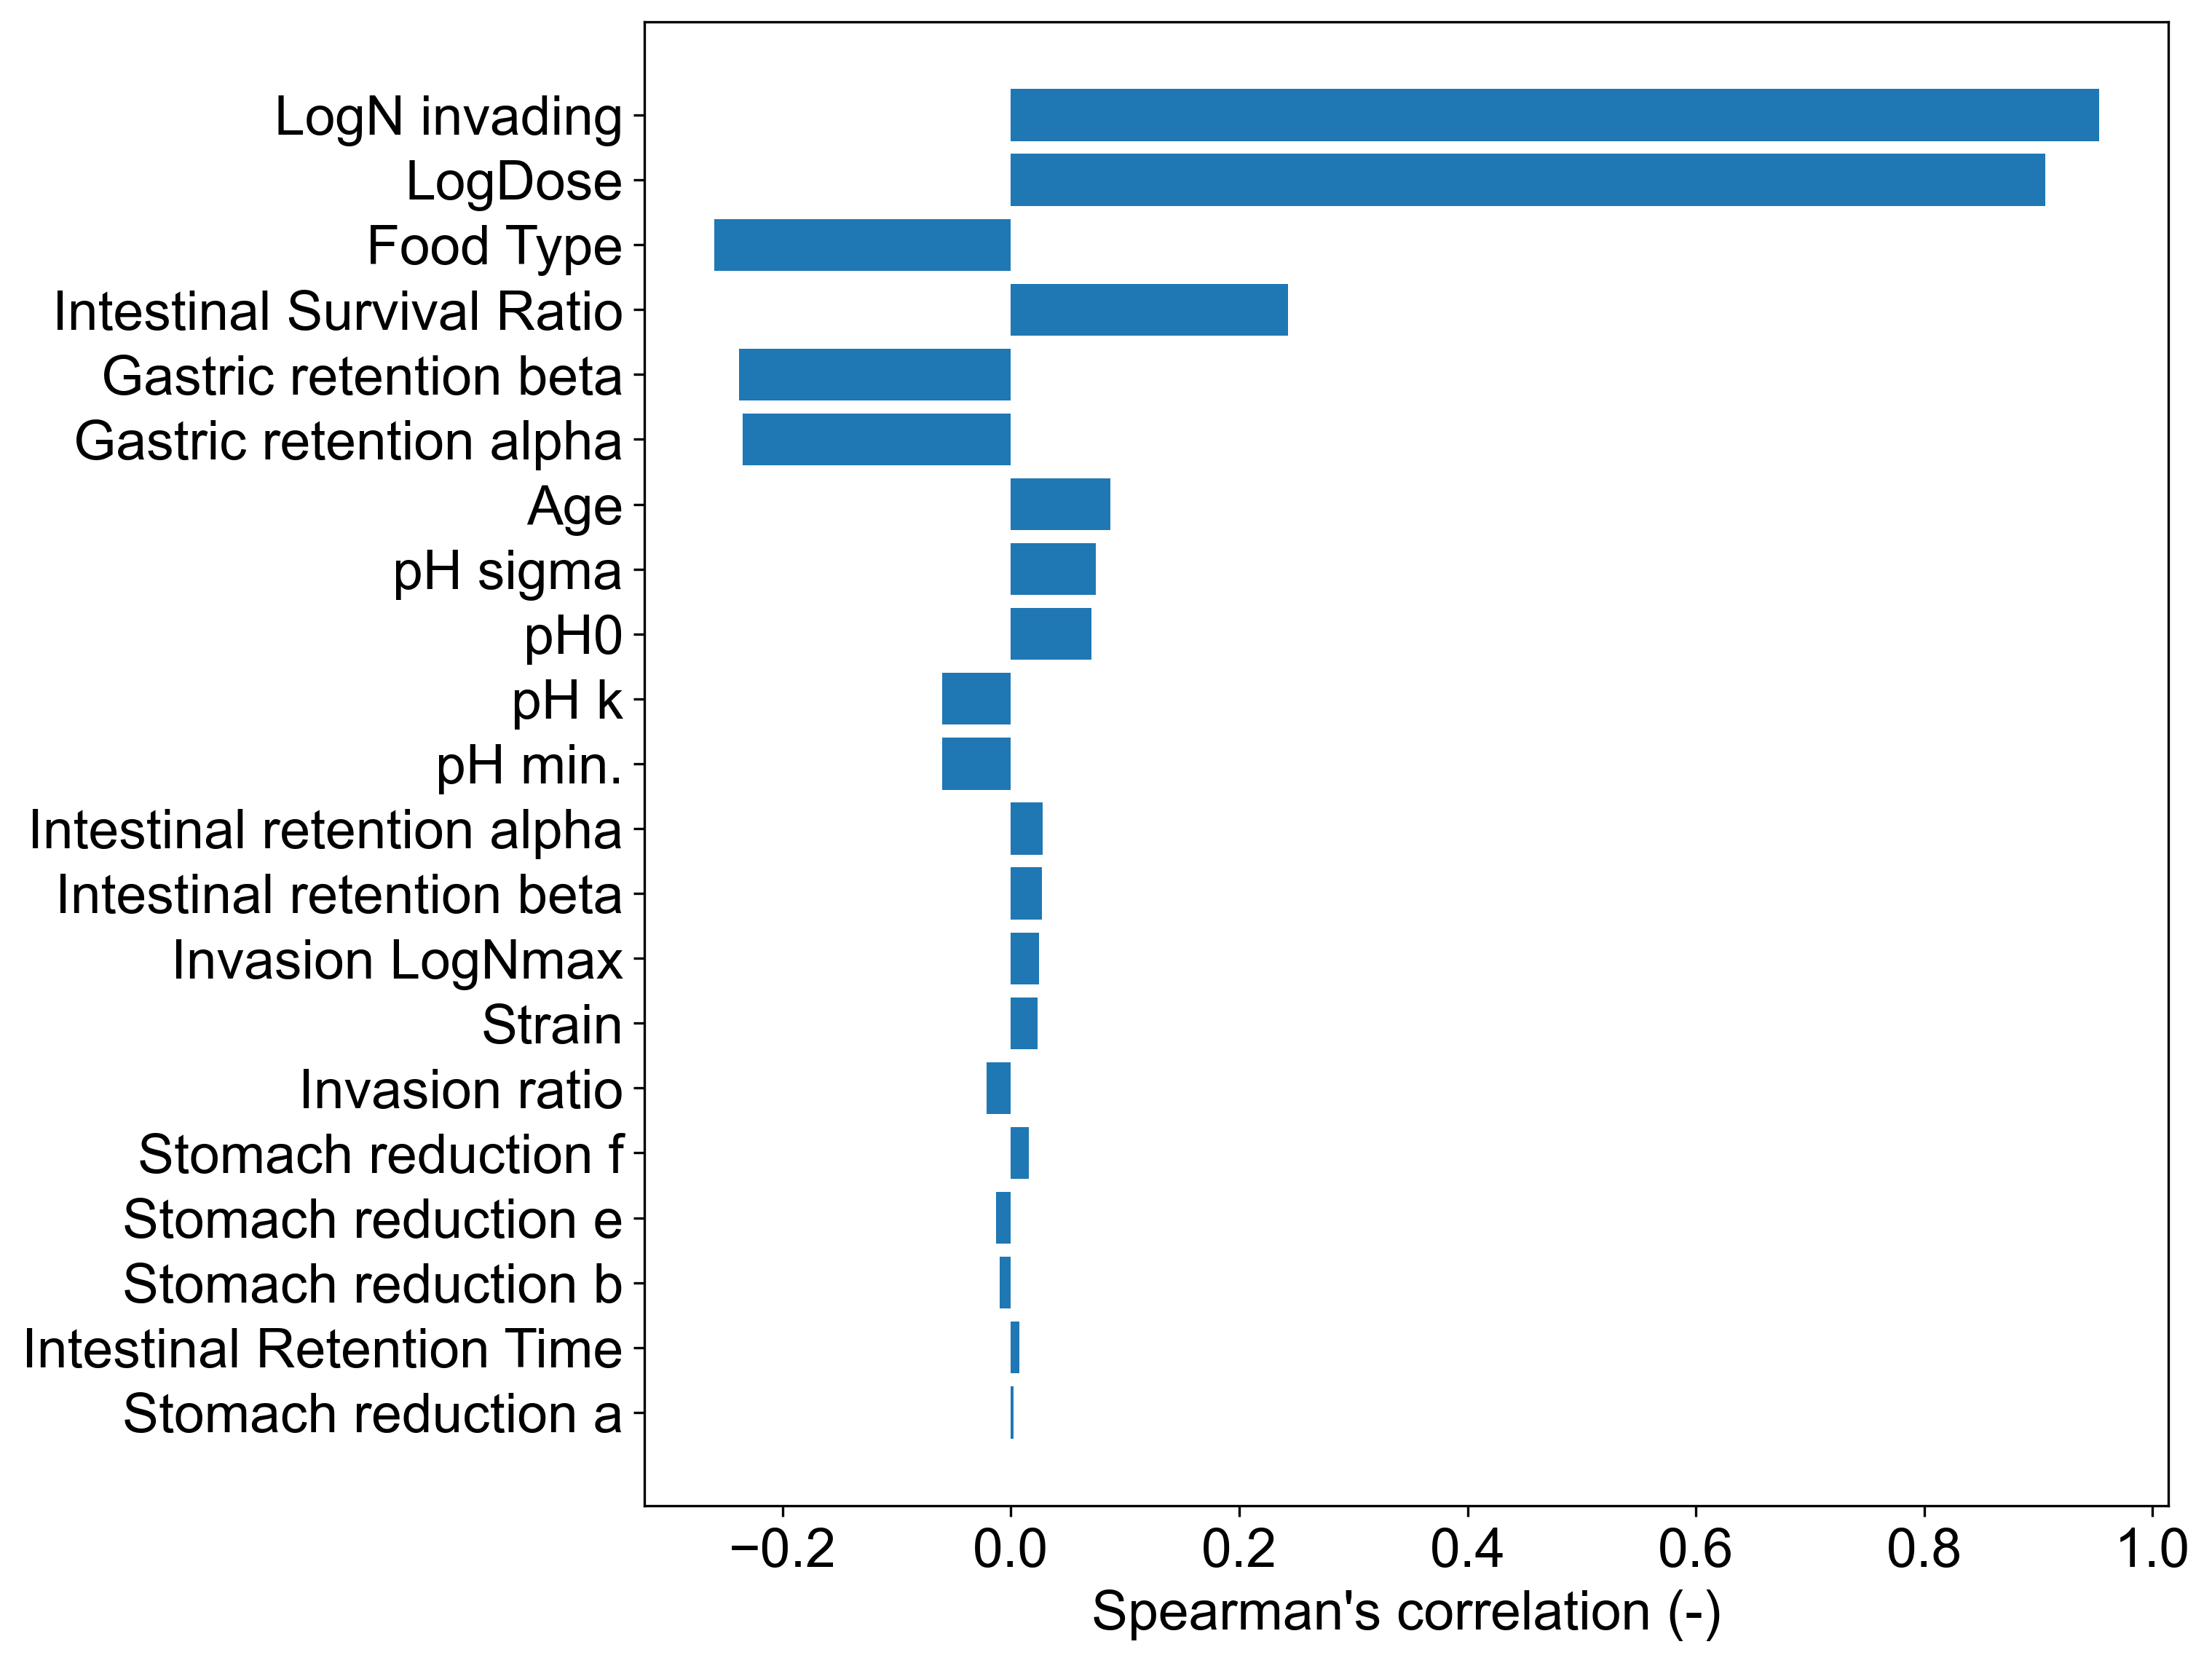

In [125]:
fig = plt.figure(figsize =(9,9), dpi=300)
ax = fig.add_subplot(111)
ax.barh(Sensitivity_corr.index[0:len(Sensitivity_corr["Invasion Probability"])-1], Sensitivity_corr["Invasion Probability"][0:len(Sensitivity_corr["Invasion Probability"])-1])
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel("Spearman's correlation (-)", size=18, fontname="Arial")
plt.show()

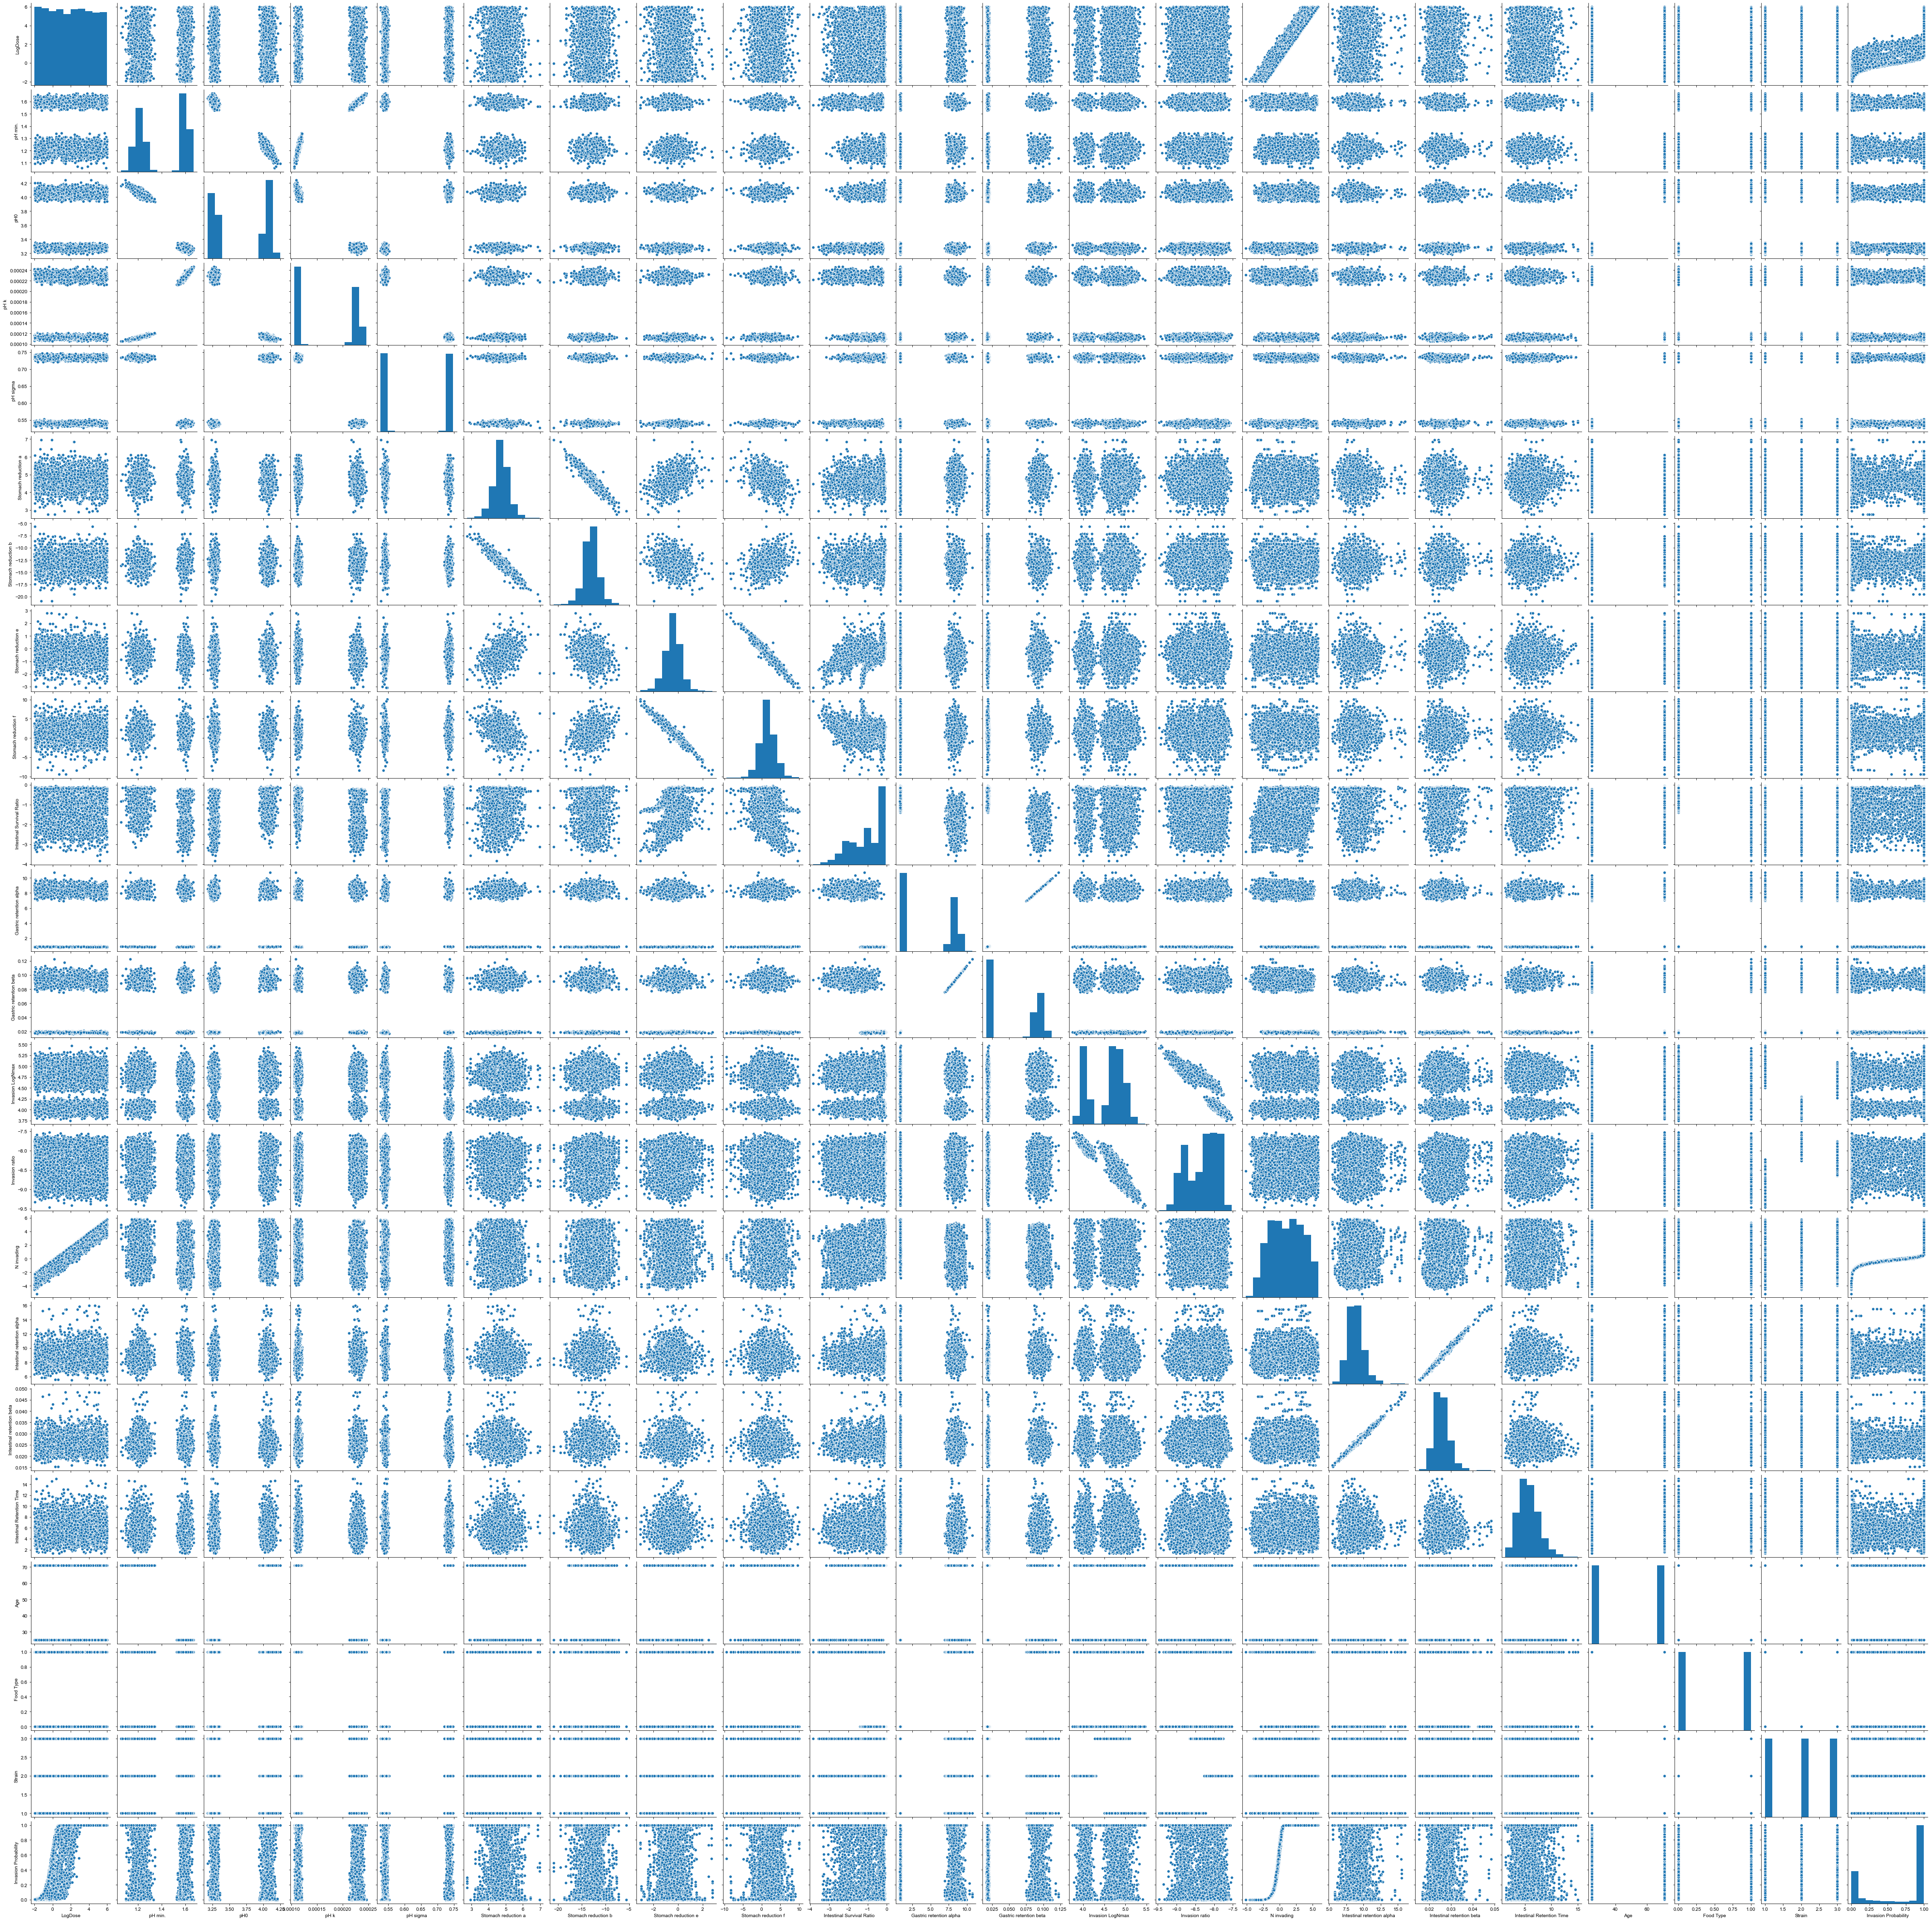

In [94]:
sns.pairplot(Sensitivity_df)

In [95]:
Sensitivity_df.dropna(how='any')

LogDose   pH min.       pH0      pH k  pH sigma  Stomach reduction a  \
0    5.286654  1.586091  3.282970  0.000225  0.547653             4.139838   
1    0.362936  1.592508  3.292508  0.000226  0.537041             4.543806   
2   -0.513041  1.585300  3.243771  0.000221  0.538012             5.225594   
3    4.451095  1.577331  3.251955  0.000216  0.542565             5.780370   
4    0.356919  1.583433  3.284796  0.000224  0.535380             4.262231   
..        ...       ...       ...       ...       ...                  ...   
995  1.528614  1.213082  4.072350  0.000114  0.734906             5.003932   
996 -1.955136  1.195671  4.091879  0.000112  0.736637             4.672473   
997 -1.419080  1.159289  4.047810  0.000109  0.731141             5.428431   
998  5.185135  1.230134  4.058464  0.000113  0.741919             4.486758   
999 -1.038876  1.172423  4.071952  0.000109  0.739093             4.799436   

     Stomach reduction b  Stomach reduction e  Stomach reduction f  \
0             -10.635327            -0.312267             1.553604   
1             -12.414080            -0.410982             1.735412   
2             -15.111996            -0.157678             0.319375   
3             -17.227597            -0.105994             0.108510   
4             -11.090783            -0.523646             2.024845   
..                   ...                  ...                  ...   
995           -13.865271             0.048286             0.302942   
996           -12.525533            -0.141099             0.941406   
997           -16.343806            -0.432604             0.707804   
998           -11.863087            -0.902310             3.504578   
999           -13.170663            -0.790245             2.641268   

     Intestinal Survival Ratio  ...  Invasion LogNmax  Invasion ratio  \
0                    -1.957576  ...          4.952582       -8.944099   
1                    -2.103228  ...          4.922785       -8.824828   
2                    -2.229834  ...          4.839656       -8.663811   
3                    -2.527361  ...          4.658858       -8.313675   
4                    -1.865625  ...          5.071394       -8.989597   
..                         ...  ...               ...             ...   
995                  -0.172410  ...          4.082305       -8.045545   
996                  -0.157517  ...          3.938496       -7.704729   
997                  -0.490641  ...          4.183639       -8.101340   
998                  -0.490509  ...          3.930040       -7.821509   
999                  -0.532734  ...          4.012317       -7.892944   

     N invading  Intestinal retention alpha  Intestinal retention beta  \
0      3.232233                    8.531994                   0.024432   
1     -1.844149                    8.571850                   0.024688   
2     -2.471107                    9.663771                   0.028273   
3      2.527688                    9.681990                   0.028591   
4     -1.527899                    8.019322                   0.023300   
..          ...                         ...                        ...   
995    1.285337                    9.479854                   0.028292   
996   -2.239921                    9.245613                   0.027051   
997   -1.696630                    9.060496                   0.026268   
998    4.380258                    8.277548                   0.024033   
999   -1.271090                    6.459355                   0.018884   

     Intestinal Retention Time   Age  Food Type  Strain  Invasion Probability  
0                     3.050000  25.0        1.0     1.0              1.000000  
1                     4.033333  25.0        1.0     1.0              0.014259  
2                     6.333333  25.0        1.0     1.0              0.003393  
3                     3.916667  25.0        1.0     1.0              1.000000  
4                     8.133333  25.0        1.0     1.0       

In [96]:
from scipy.stats import spearmanr
spearmanr(
    Sensitivity_df["Invasion Probability"], 
    Sensitivity_df["Stomach reduction b"]
)

SpearmanrResult(correlation=-0.00987450095859213, pvalue=0.2794253842423877)